
## Time Series GPTs

* UCI Time series data 



## Libraries


In [1]:

## !pip install pandas
## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
## from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR
import json
import os
import copy




In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

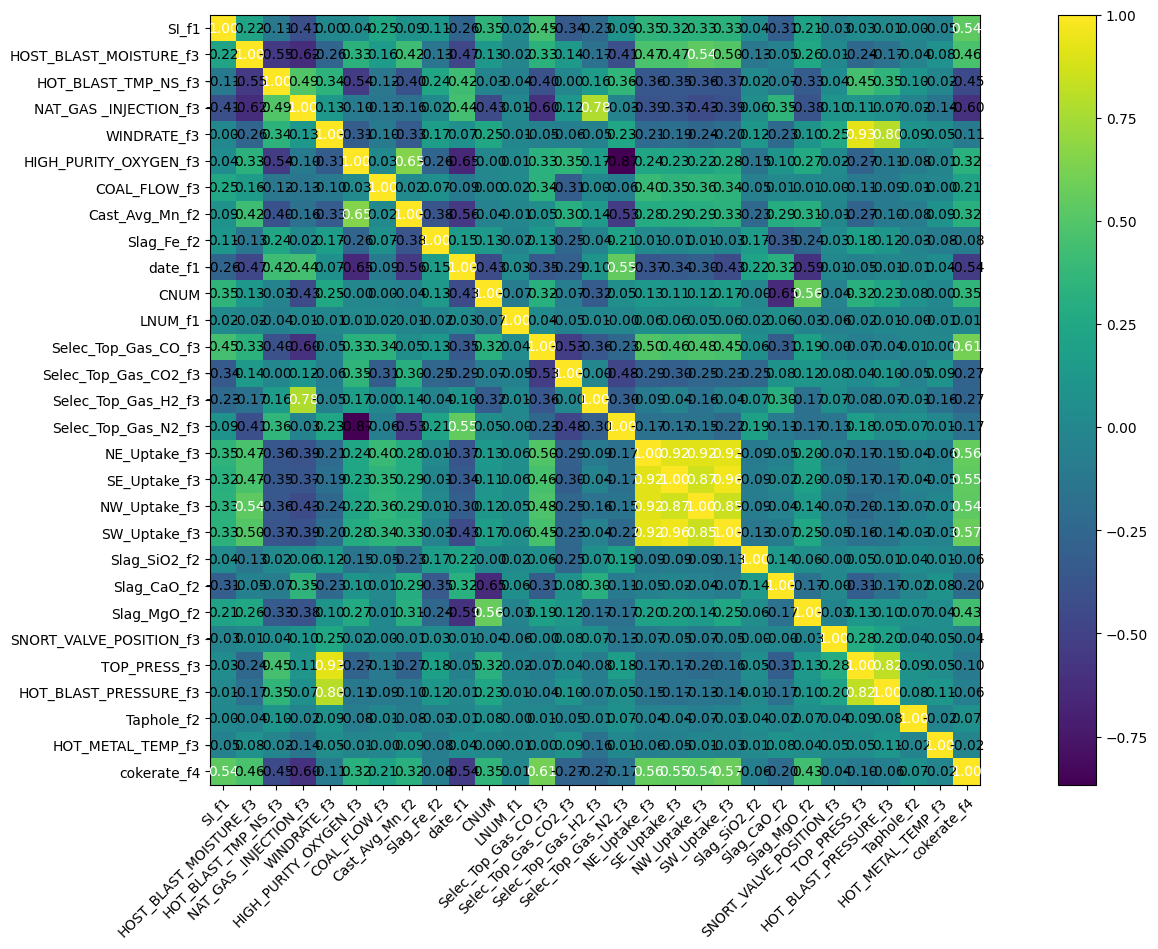

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## UCI data


In [15]:

tsDataWrangling_obj.read_UCI_data()


In [16]:

tsDataWrangling_obj.UCI_Energy_data_df 


date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4       RH_4  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  45.566667   
1      19.200000  44.722500  19.790000  44.790000  19.000000  45.992500   
2      19.200000  44.626667  19.790000  44.933333  18.926667  45.890000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  45.723333   
4      19.200000  44.530000  19.790000  45.000000  18.890000  45.530000   
...          ...        ...        ...        ...        ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  45.590000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  45.590000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  45.730000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  45.790000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  45.963333   

              T5       RH_5         T6       RH_6         T7       RH_7  \
0      17.166667  55.200000   7.026667  84.256667  17.200000  41.626667   
1      17.166667  55.200000   6.833333  84.063333  17.200000  41.560000   
2      17.166667  55.090000   6.560000  83.156667  17.200000  41.433333   
3      17.166667  55.090000   6.433333  83.423333  17.133333  41.290000   
4      17.200000  55.090000   6.366667  84.893333  17.200000  41.230000   
...          ...        ...        ...        ...        ...        ...   
19730  23.200000  52.400000  24.796667   1.000000  24.500000  44.500000   
19731  23.230000  52.326667  24.196667   1.000000  24.557143  44.414286   
19732  23.230000  52.266667  23.626667   1.000000  24.540000  44.400000   
19733  23.200000  52.200000  22.433333   1.000000  24.500000  44.295714   
19734  23.200000  52.200000  21.026667   1.000000  24.500000  44.054000   

            T8       RH_8         T9     RH_9      T_out  Press_mm_hg  \
0      18.2000  48.900000  17.033333  45.5300   6.600000        733.5   
1      18.2000  48.863333  17.066667  45.5600   6.483333        733.6   
2      18.2000  48.730000  17.000000  45.5000   6.366667        733.7   
3      18.1000  48.590000  17.000000  45.4000   6.250000        733.8   
4      18.1000  48.590000  17.000000  45.4000   6.133333        733.9   
...        ...        ...        ...      ...        ...          ...   
19730  24.7000  50.074000  23.200000  46.7900  22.733333        755.2   
19731  24.7000  49.790000  23.200000  46.7900  22.600000        755.2   
19732  24.7000  49.660000  23.200000  46.7900  22.466667        755.2   
19733  24.6625  49.518750  23.200000  46.8175  22.333333        755.2   
19734  24.7360  49.736000  23.200000  46.8450  22.200000        755.2   

          RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0      92.000000   7.000000   63.000000   5.300000  13.275433  13.275433  
1      92.000000   6.666667   59.166667   5.200000  18.606195  18.606195  
2      92.000000   6.333333   55.333333   5.100000  28.642668  28.642668  
3      92.000000   6.000000   51.500000   5.000000  45.410389  45.410389  
4      92.000000   5.666667   47.666667   4.900000  10.084097  10.084097  
...          ...        ... 

In [17]:

tsDataWrangling_obj.format_appliances_data_to_match_CIVS()


In [18]:

tsDataWrangling_obj.UCI_Energy_data_df


lights         T1  Appliances       RH_1         T2       RH_2  \
0          30  19.890000          60  47.596667  19.200000  44.790000   
1          30  19.890000          60  46.693333  19.200000  44.722500   
2          30  19.890000          50  46.300000  19.200000  44.626667   
3          40  19.890000          50  46.066667  19.200000  44.590000   
4          40  19.890000          60  46.333333  19.200000  44.530000   
...       ...        ...         ...        ...        ...        ...   
19730       0  25.566667         100  46.560000  25.890000  42.025714   
19731       0  25.500000          90  46.500000  25.754000  42.080000   
19732      10  25.500000         270  46.596667  25.628571  42.768571   
19733      10  25.500000         420  46.990000  25.414000  43.036000   
19734      10  25.500000         430  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4         T5       RH_5  \
0      19.790000  44.730000  19.000000  45.566667  17.166667  55.200000   
1      19.790000  44.790000  19.000000  45.992500  17.166667  55.200000   
2      19.790000  44.933333  18.926667  45.890000  17.166667  55.090000   
3      19.790000  45.000000  18.890000  45.723333  17.166667  55.090000   
4      19.790000  45.000000  18.890000  45.530000  17.200000  55.090000   
...          ...        ...        ...        ...        ...        ...   
19730  27.200000  41.163333  24.700000  45.590000  23.200000  52.400000   
19731  27.133333  41.223333  24.700000  45.590000  23.230000  52.326667   
19732  27.050000  41.690000  24.700000  45.730000  23.230000  52.266667   
19733  26.890000  41.290000  24.700000  45.790000  23.200000  52.200000   
19734  26.823333  41.156667  24.700000  45.963333  23.200000  52.200000   

              T6       RH_6         T7       RH_7       T8       RH_8  \
0       7.026667  84.256667  17.200000  41.626667  18.2000  48.900000   
1       6.833333  84.063333  17.200000  41.560000  18.2000  48.863333   
2       6.560000  83.156667  17.200000  41.433333  18.2000  48.730000   
3       6.433333  83.423333  17.133333  41.290000  18.1000  48.590000   
4       6.366667  84.893333  17.200000  41.230000  18.1000  48.590000   
...          ...        ...        ...        ...      ...        ...   
19730  24.796667   1.000000  24.500000  44.500000  24.7000  50.074000   
19731  24.196667   1.000000  24.557143  44.414286  24.7000  49.790000   
19732  23.626667   1.000000  24.540000  44.400000  24.7000  49.660000   
19733  22.433333   1.000000  24.500000  44.295714  24.6625  49.518750   
19734  21.026667   1.000000  24.500000  44.054000  24.7360  49.736000   

              T9     RH_9      T_out  Press_mm_hg     RH_out  Windspeed  \
0      17.033333  45.5300   6.600000        733.5  92.000000   7.000000   
1      17.066667  45.5600   6.483333        733.6  92.000000   6.666667   
2      17.000000  45.5000   6.366667        733.7  92.000000   6.333333   
3      17.000000  45.4000   6.250000        733.8  92.000000   6.000000   
4      17.000000  45.4000   6.133333        733.9  92.000000   5.666667   
...          ...      ...        ...          ...        ...        ...   
19730  23.200000  46.7900  22.733333        755.2  55.666667   3.333333   
19731  23.200000  46.7900  22.600000        755.2  56.000000   3.500000   
19732  23.200000  46.7900  22.466667        755.2  56.333333   3.666667   
19733  23.200000  46.8175  22.333333        755.2  56.666667   3.833333   
19734  23.200000  46.8450  22.200000        755.2  57.000000   4.000000   

       Visibility  Tdewpoint        rv1        rv2  
0       63.000000   5.300000  13.275433  13.275433  
1       59.166667   5.200000  18.606195  18.606195  
2       55.333333   5.100000  28.642668  28.642668  
3       51.500000   5.000000  45.410389  45.410389  
4       47.666667   4.900000  10.084097  10.084097  
...           ...        ...        ...        ...  
19730   23.666667  13.333333  43.096812  43.096812  
19731   24.500000  13.30000

In [19]:

print(list(tsDataWrangling_obj.UCI_Energy_data_df.columns))   


['lights', 'T1', 'Appliances', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [20]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.UCI_Energy_data_df



## Correlation Matrix


In [21]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['lights', 'T1', 'Appliances', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
                        'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 
                        'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [22]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lights       19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   Appliances   19735 non-null  int64  
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

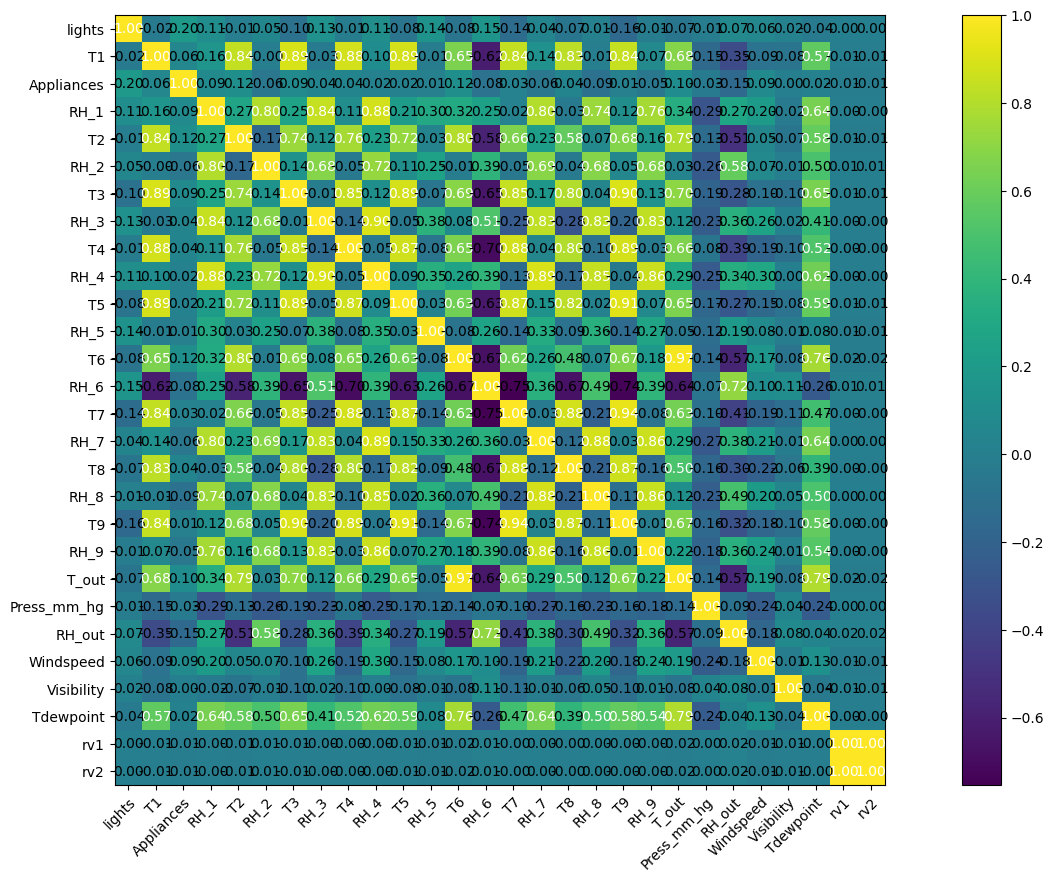

In [23]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [24]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


19735



## Training Functions


In [25]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [26]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [27]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [28]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [29]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        ## loss_SI     = F.mse_loss(    pred_si, y_si   )
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        ## loss_total  = alpha * loss_SI + (1 - alpha) * loss_all 
        
        ## alpha      = 0.9
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ###################################################################################
        
        main_loss       = criterion(idx_pred[:, :], yb[:, :])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 50 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
        
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled





## Train on Train, Test on Test


In [30]:

 inferenceGPT_obj.initialize_preds_lists()



## Run 1


In [31]:

( 
  chunk400to500_train, 
  chunk300to500_train, 
  chunk200to500_train, 
  chunk100to500_train, 
  chunk000to500_train, 
  test_CIVS
) = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.254557
Loss_SI: 1.3550244569778442 Loss_all: 1.2482013702392578
===


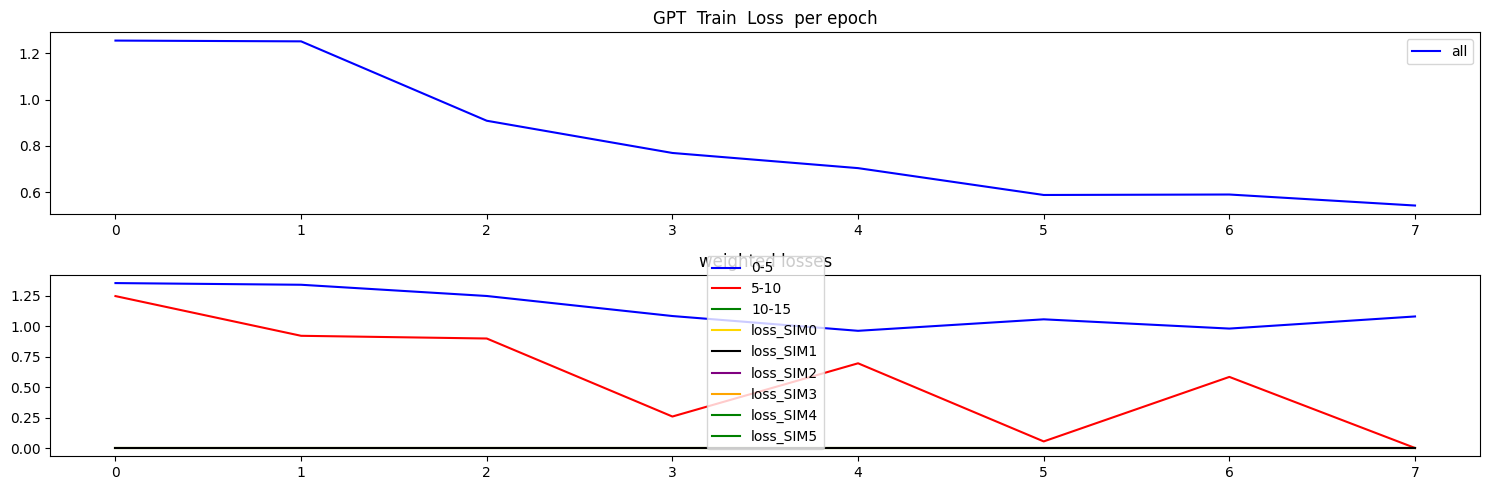

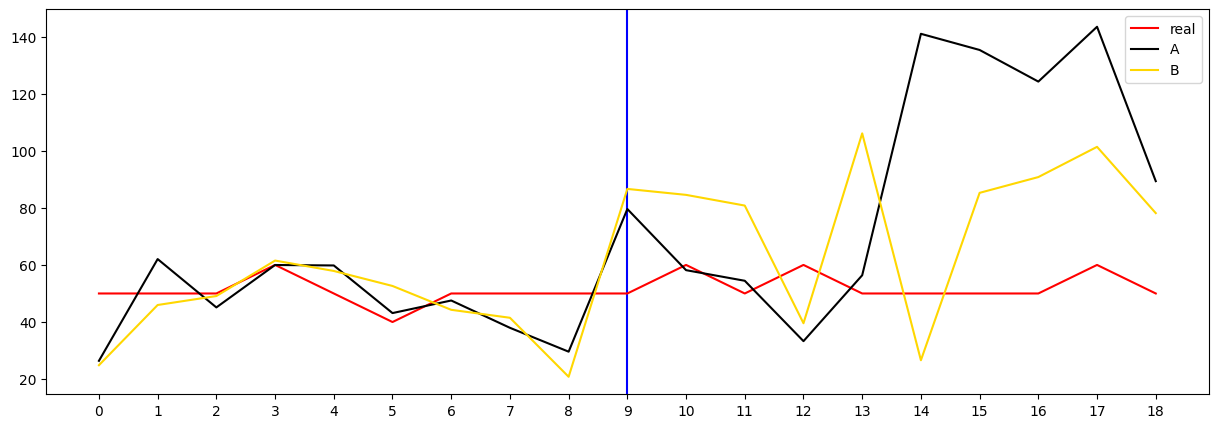

Which prediction is better? (A/B/skip): a
Saved preference.


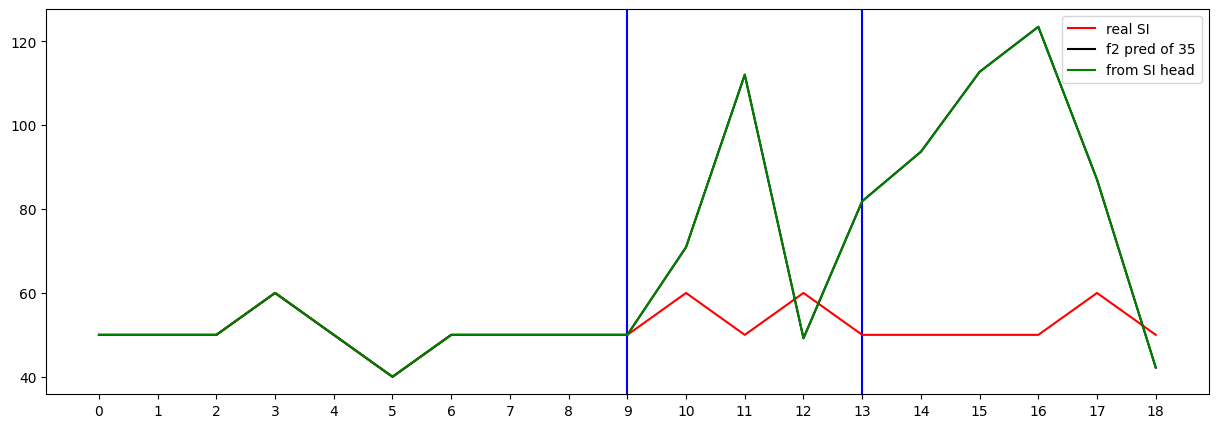

Testing R**2 - (all) - (no inputs):  0.9945119072953489
Testing R**2 - (f2) - SI full (no inputs):  -98.50012629181396
Testing R**2 - SI head only (no inputs):  -98.50012629181396
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -15.785404629074257
2 ...index R**2 (no inputs):  -98.50012629181396
3 ...index R**2 (no inputs):  -151.5728311748297
4 ...index R**2 (no inputs):  -59.54987997940948
5 ...index R**2 (no inputs):  -20.54184939291075
6 ...index R**2 (no inputs):  -4.564775453581943
7 ...index R**2 (no inputs):  -799.2255523724435
8 ...index R**2 (no inputs):  -162.99870532205114
9 ...index R**2 (no inputs):  -258.7839935836373
10 ...index R**2 (no inputs):  -150.28790684179666
11 ...index R**2 (no inputs):  -2668.2981537155647
12 ...index R**2 (no inputs):  -66.27804592618062
13 ...index R**2 (no inputs):  -70.20141025222298
14 ...index R**2 (no inputs):  -6.4956409224081115
15 ...index R**2 (no inputs):  -7.507357674581163
16 ...index R**2 (no inputs):  -3.087937

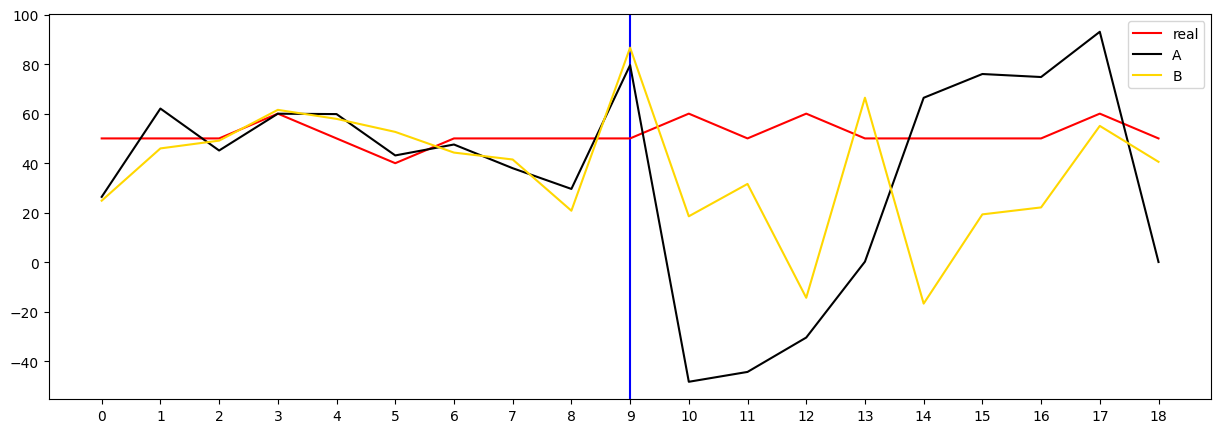

Which prediction is better? (A/B/skip): b
Saved preference.


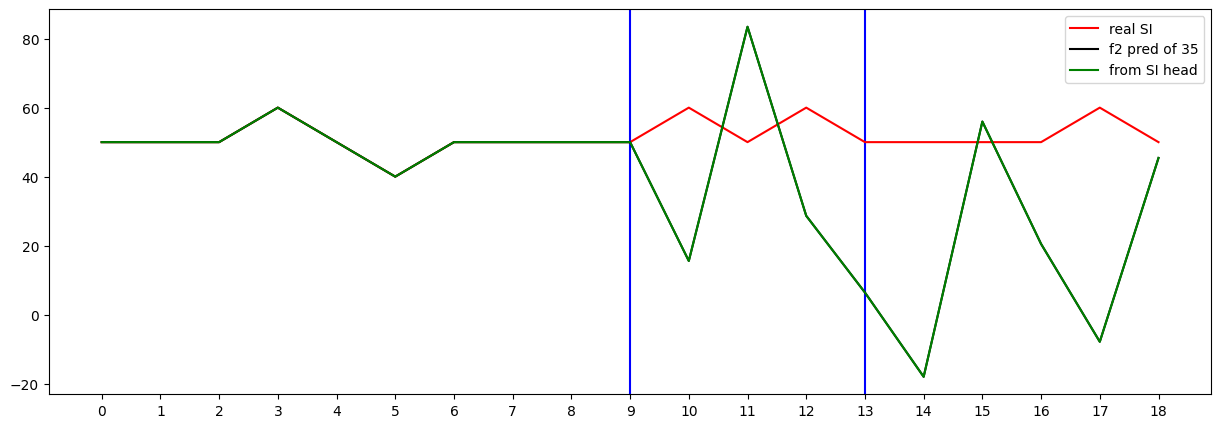

Testing R**2 - (all) - (no inputs):  0.9938698767038867
Testing R**2 - (f2) - SI full (no inputs):  -86.92382414667327
Testing R**2 - SI head only (no inputs):  -86.92382414667327
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -11.729444620265964
2 ...index R**2 (no inputs):  -86.92382414667327
3 ...index R**2 (no inputs):  -699.1902131385928
4 ...index R**2 (no inputs):  -187.6106627784553
5 ...index R**2 (no inputs):  -88.88013411506117
6 ...index R**2 (no inputs):  -143.44384500862526
7 ...index R**2 (no inputs):  -129.3974205237034
8 ...index R**2 (no inputs):  -220.87663712177545
9 ...index R**2 (no inputs):  -157.49888164778002
10 ...index R**2 (no inputs):  -7.566990287588753
11 ...index R**2 (no inputs):  -7633.64933533475
12 ...index R**2 (no inputs):  -182.56781355676222
13 ...index R**2 (no inputs):  -52.51579075431112
14 ...index R**2 (no inputs):  -5.524521030210513
15 ...index R**2 (no inputs):  -75.20770462356161
16 ...index R**2 (no inputs):  -5.8531141

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 

res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, model_DPO , x_means, x_standard_devs,  9  )



[0] Train Loss: 1.243086
Loss_SI: 1.1577290296554565 Loss_all: 1.2364293336868286
===


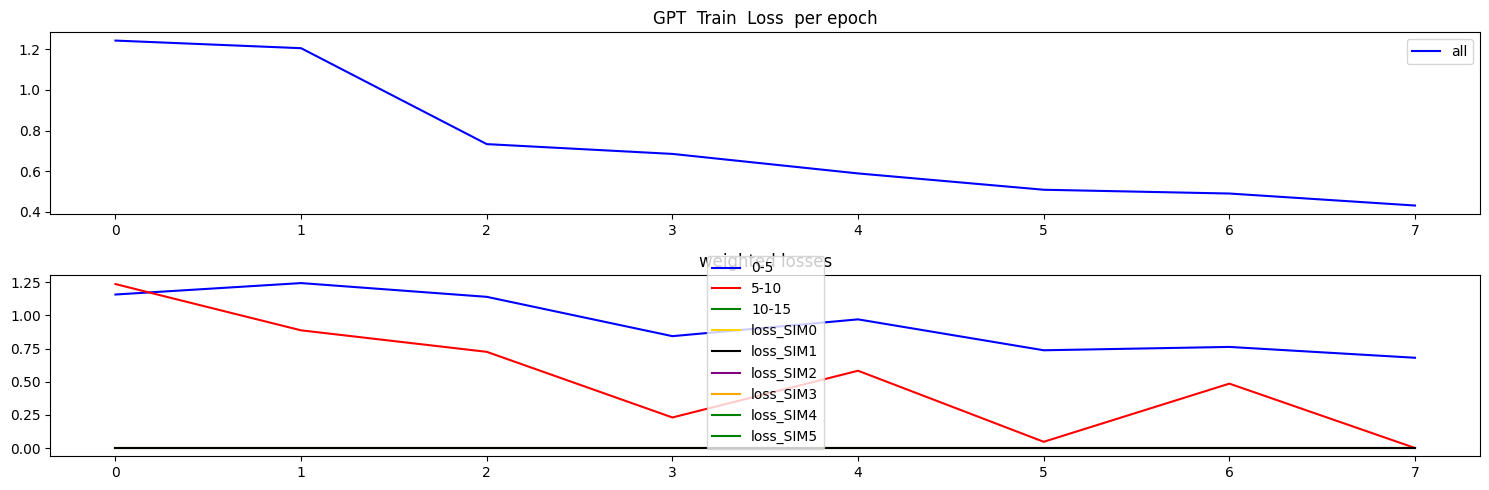

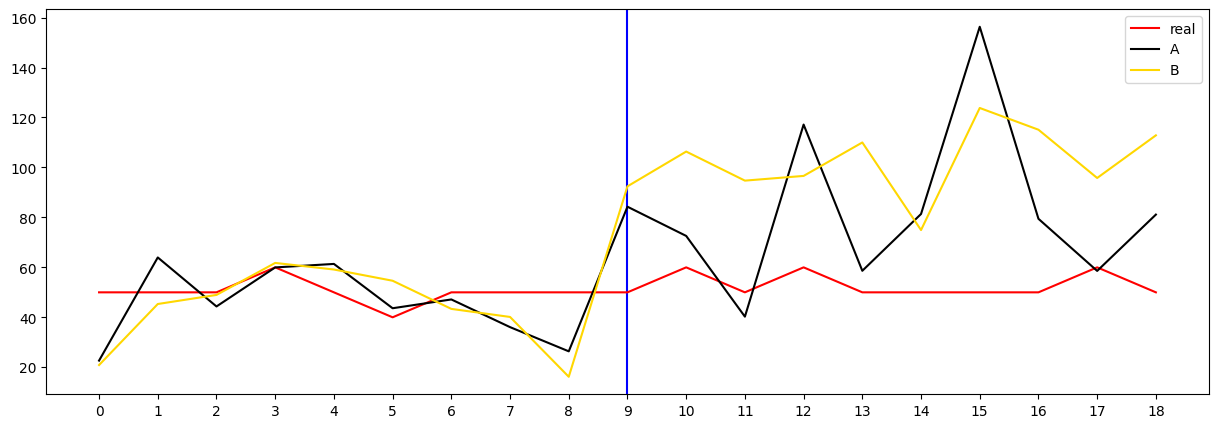

Which prediction is better? (A/B/skip): a
Saved preference.


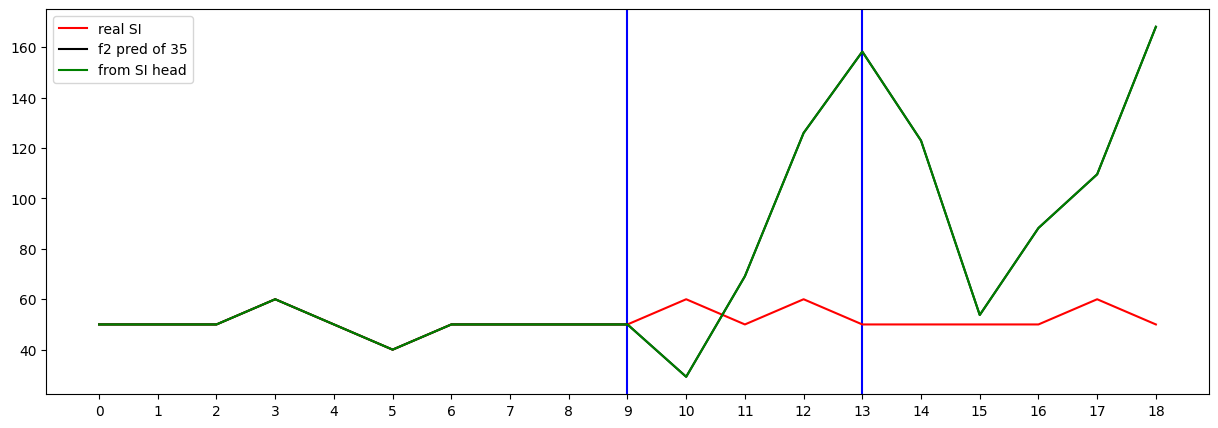

Testing R**2 - (all) - (no inputs):  0.9874186542613625
Testing R**2 - (f2) - SI full (no inputs):  -266.69335621381555
Testing R**2 - SI head only (no inputs):  -266.69335621381555
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -15.75313065213447
2 ...index R**2 (no inputs):  -266.69335621381555
3 ...index R**2 (no inputs):  -253.36316882139383
4 ...index R**2 (no inputs):  -100.39287875195514
5 ...index R**2 (no inputs):  -171.89410575940846
6 ...index R**2 (no inputs):  -896.8332449210747
7 ...index R**2 (no inputs):  -4651.516452600974
8 ...index R**2 (no inputs):  -70.90991201746485
9 ...index R**2 (no inputs):  -438.90837969500615
10 ...index R**2 (no inputs):  -24.043231374017328
11 ...index R**2 (no inputs):  -1125.8312636940248
12 ...index R**2 (no inputs):  -143.26702451073376
13 ...index R**2 (no inputs):  -162.22551982712065
14 ...index R**2 (no inputs):  -17.669923183070793
15 ...index R**2 (no inputs):  -239.4238572639944
16 ...index R**2 (no inputs):  -6

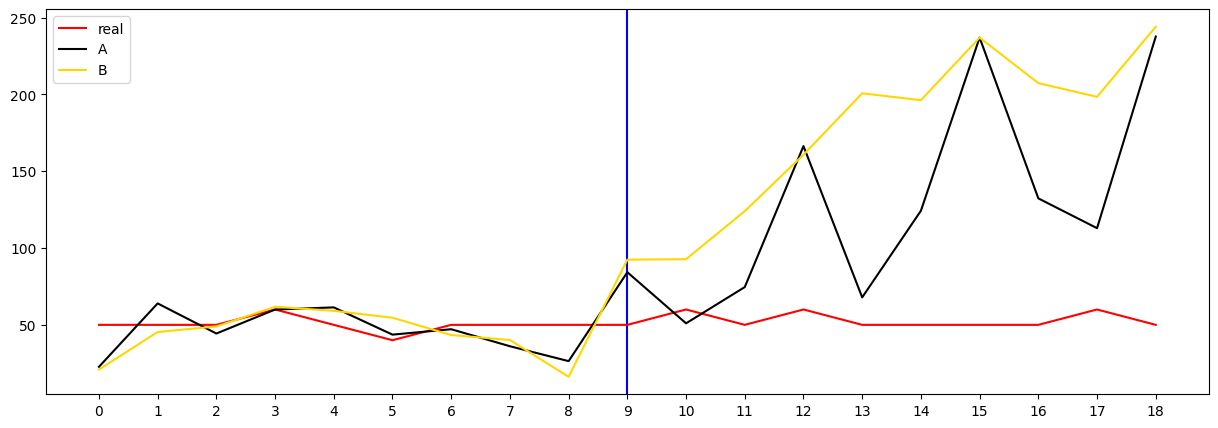

Which prediction is better? (A/B/skip): a
Saved preference.


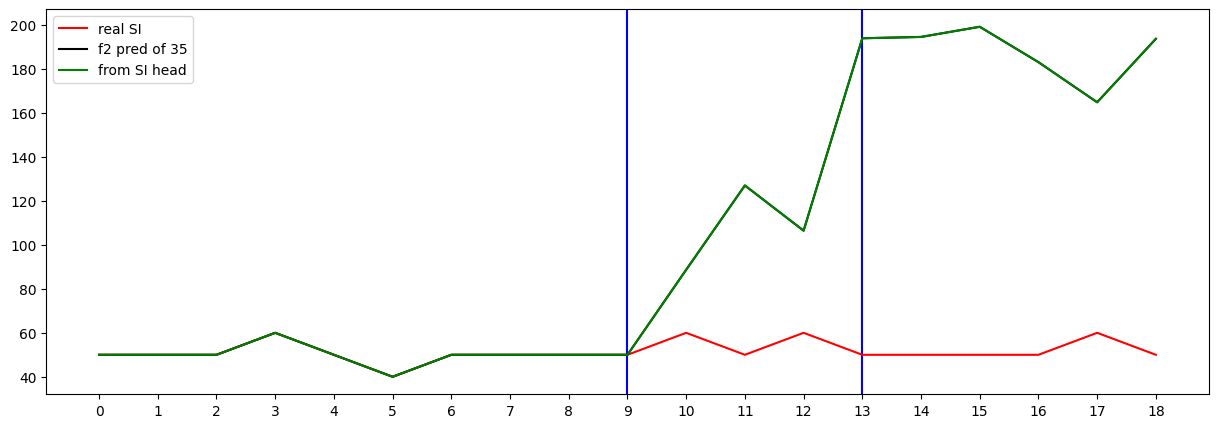

Testing R**2 - (all) - (no inputs):  0.9668306673783136
Testing R**2 - (f2) - SI full (no inputs):  -784.2113136507407
Testing R**2 - SI head only (no inputs):  -784.2113136507407
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -26.217066415489736
2 ...index R**2 (no inputs):  -784.2113136507407
3 ...index R**2 (no inputs):  -2322.3520697506433
4 ...index R**2 (no inputs):  -719.9848942468524
5 ...index R**2 (no inputs):  -251.00269760189278
6 ...index R**2 (no inputs):  -338.78574579258196
7 ...index R**2 (no inputs):  -2420.4704743832167
8 ...index R**2 (no inputs):  -160.26355981686982
9 ...index R**2 (no inputs):  -1175.682510579672
10 ...index R**2 (no inputs):  -892.0833942925619
11 ...index R**2 (no inputs):  -113229.88549497606
12 ...index R**2 (no inputs):  -870.7704968431751
13 ...index R**2 (no inputs):  -177.20345368550855
14 ...index R**2 (no inputs):  -110.19727146203012
15 ...index R**2 (no inputs):  -893.8491242803989
16 ...index R**2 (no inputs):  -31.1

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




[0] Train Loss: 1.370341
Loss_SI: 1.2900742292404175 Loss_all: 1.3638161420822144
===


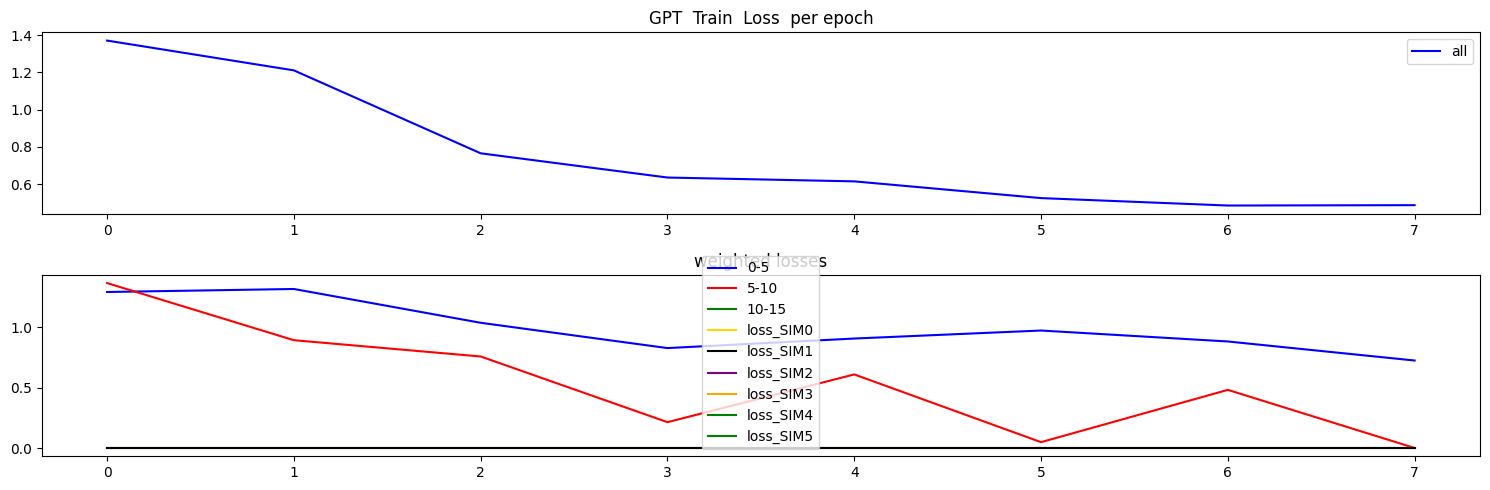

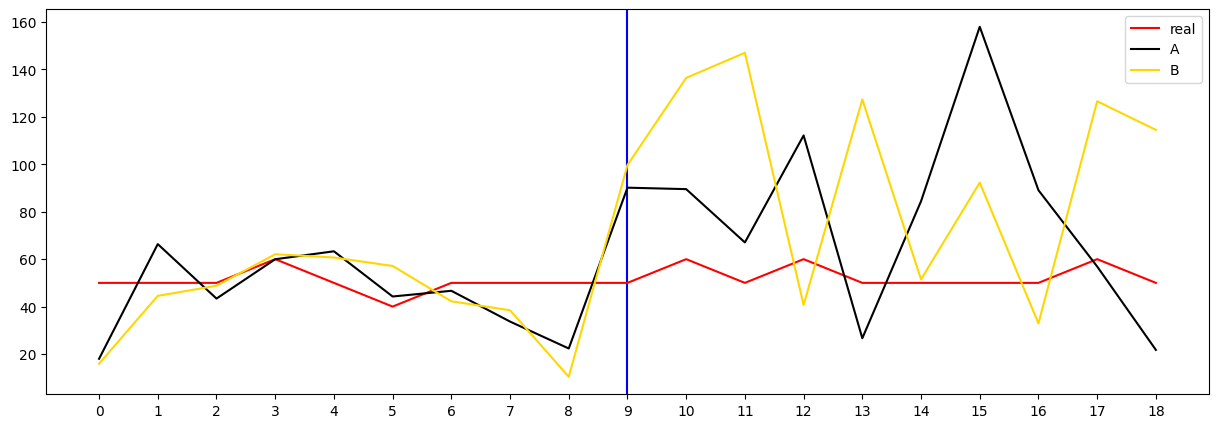

Which prediction is better? (A/B/skip): s


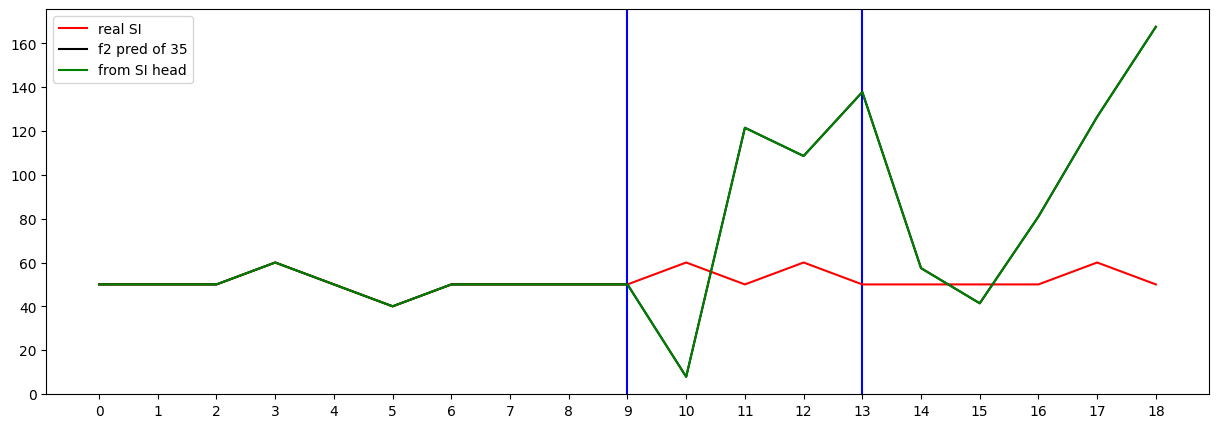

Testing R**2 - (all) - (no inputs):  0.9885310532248974
Testing R**2 - (f2) - SI full (no inputs):  -236.55799523025368
Testing R**2 - SI head only (no inputs):  -236.55799523025368
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -25.751509807612884
2 ...index R**2 (no inputs):  -236.55799523025368
3 ...index R**2 (no inputs):  -311.70876198000485
4 ...index R**2 (no inputs):  -307.0932203049786
5 ...index R**2 (no inputs):  -272.79393356080664
6 ...index R**2 (no inputs):  -259.2090075497461
7 ...index R**2 (no inputs):  -5390.305396748074
8 ...index R**2 (no inputs):  -46.880511309221674
9 ...index R**2 (no inputs):  -596.4950932825658
10 ...index R**2 (no inputs):  -50.7892112468832
11 ...index R**2 (no inputs):  -2088.952466057883
12 ...index R**2 (no inputs):  -142.64999299771674
13 ...index R**2 (no inputs):  -94.53605576019164
14 ...index R**2 (no inputs):  -5.920725719683854
15 ...index R**2 (no inputs):  -399.6396195881983
16 ...index R**2 (no inputs):  -89.628

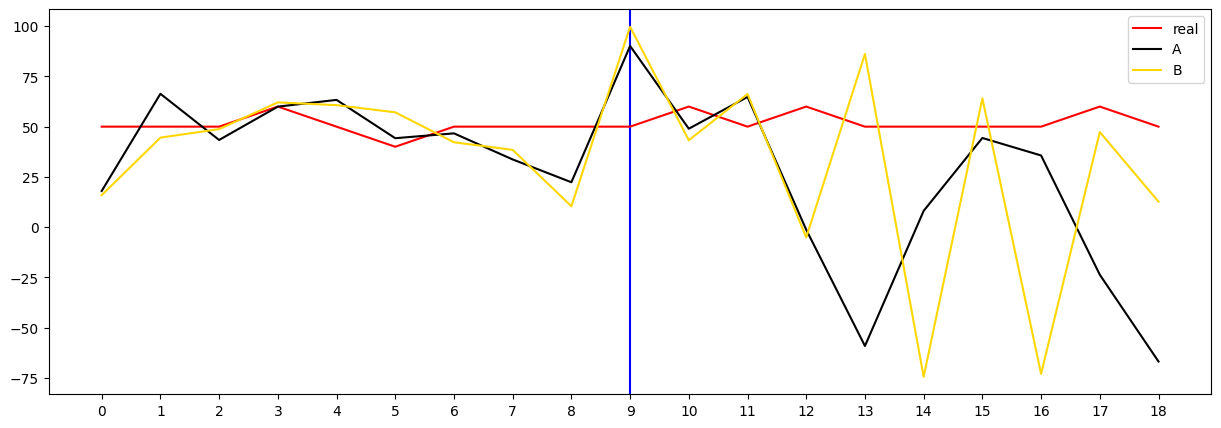

Which prediction is better? (A/B/skip): b
Saved preference.


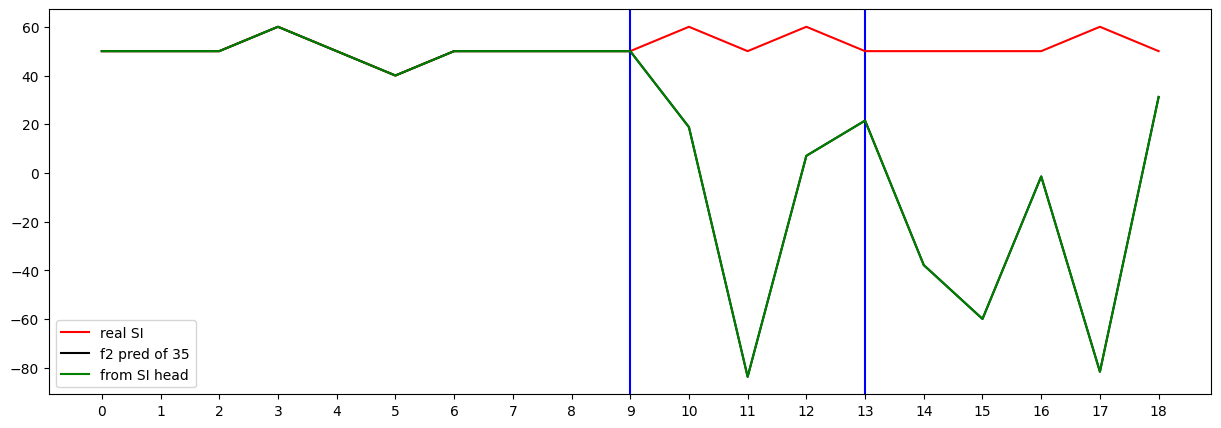

Testing R**2 - (all) - (no inputs):  0.9818283428028025
Testing R**2 - (f2) - SI full (no inputs):  -419.9896552499362
Testing R**2 - SI head only (no inputs):  -419.9896552499362
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -6.340253907341007
2 ...index R**2 (no inputs):  -419.9896552499362
3 ...index R**2 (no inputs):  -6779.911170533111
4 ...index R**2 (no inputs):  -206.14354341424152
5 ...index R**2 (no inputs):  -415.36965931538134
6 ...index R**2 (no inputs):  -1253.2695868071944
7 ...index R**2 (no inputs):  -11798.373444300489
8 ...index R**2 (no inputs):  -38.563118679578906
9 ...index R**2 (no inputs):  -427.69310420415843
10 ...index R**2 (no inputs):  -99.83673751912826
11 ...index R**2 (no inputs):  -39293.38718812752
12 ...index R**2 (no inputs):  -438.42702369713913
13 ...index R**2 (no inputs):  -31.820007704790207
14 ...index R**2 (no inputs):  -20.874491270588774
15 ...index R**2 (no inputs):  -1259.6287114358233
16 ...index R**2 (no inputs):  -253

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.345250
Loss_SI: 1.255632758140564 Loss_all: 1.3386739492416382
===


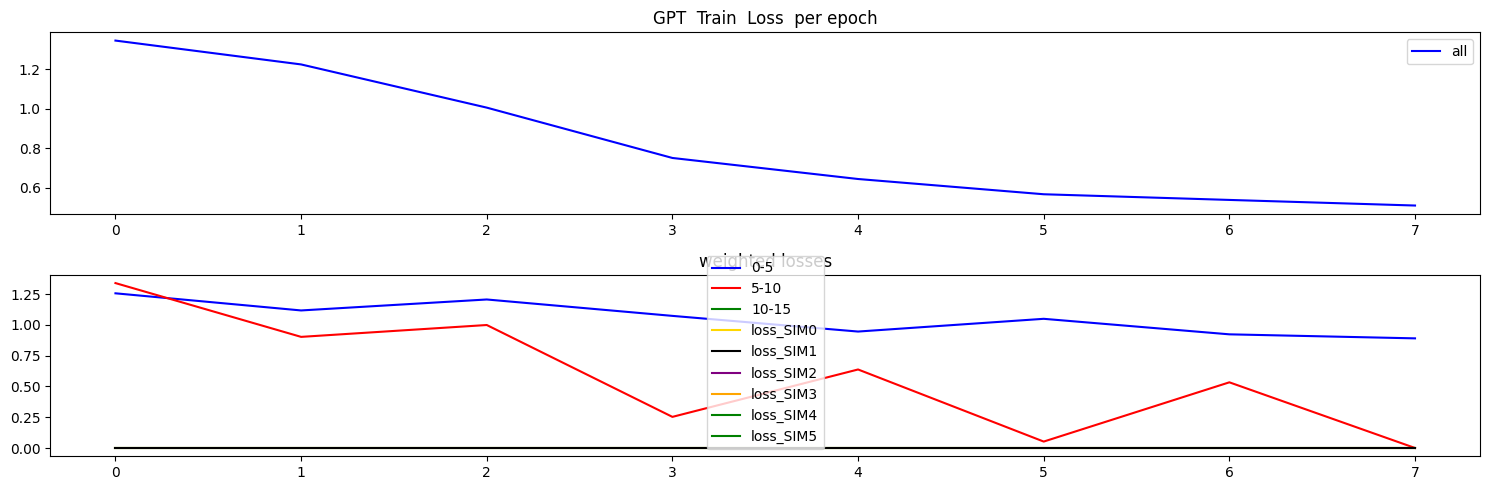

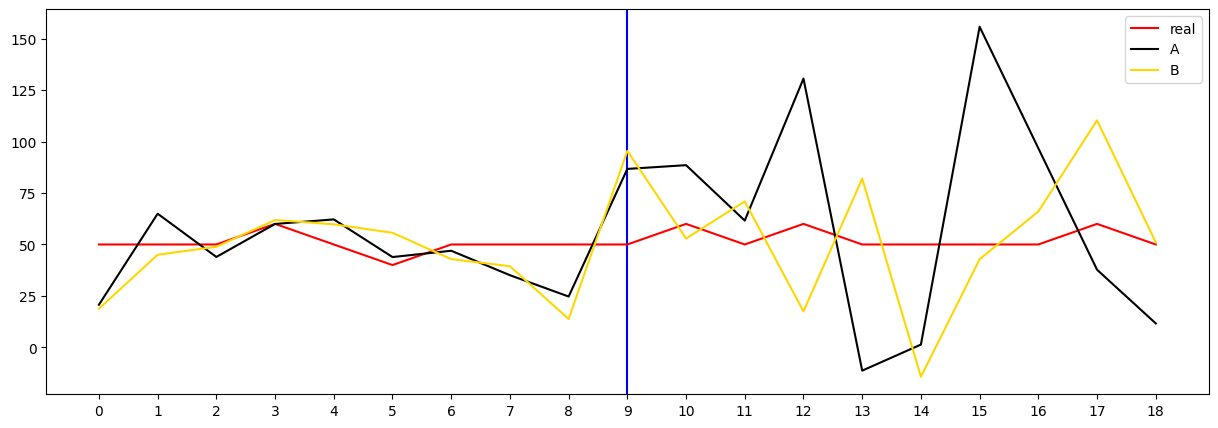

Which prediction is better? (A/B/skip): b
Saved preference.


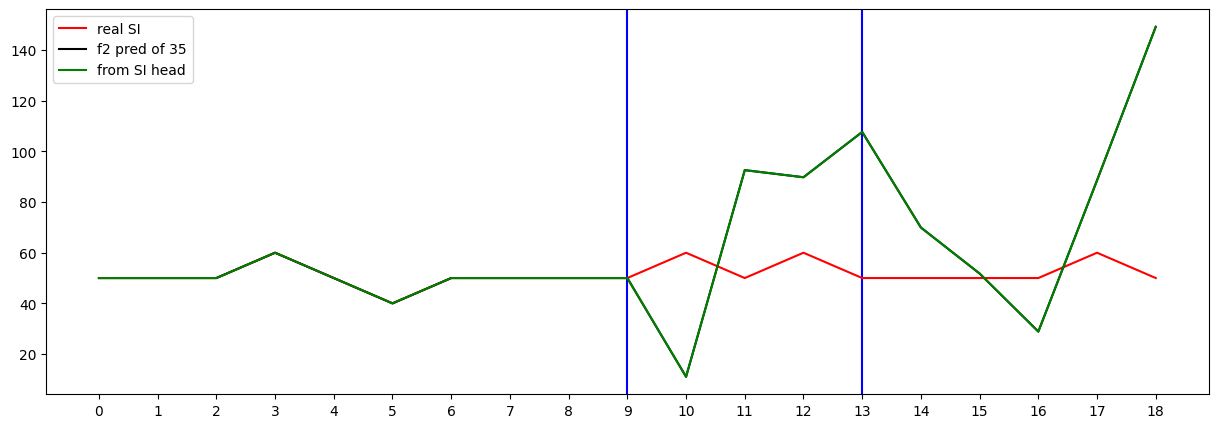

Testing R**2 - (all) - (no inputs):  0.9936685482382149
Testing R**2 - (f2) - SI full (no inputs):  -128.84878901080737
Testing R**2 - SI head only (no inputs):  -128.84878901080737
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -34.699598949127704
2 ...index R**2 (no inputs):  -128.84878901080737
3 ...index R**2 (no inputs):  -301.0033693702473
4 ...index R**2 (no inputs):  -130.7361169698738
5 ...index R**2 (no inputs):  -48.25063593977686
6 ...index R**2 (no inputs):  -90.09414270160738
7 ...index R**2 (no inputs):  -4358.887907655035
8 ...index R**2 (no inputs):  -131.2688343393361
9 ...index R**2 (no inputs):  -113.20385621352916
10 ...index R**2 (no inputs):  -26.45580536737362
11 ...index R**2 (no inputs):  -2368.5859880464145
12 ...index R**2 (no inputs):  -151.90802714755597
13 ...index R**2 (no inputs):  -6.699058409442608
14 ...index R**2 (no inputs):  -22.516751238958882
15 ...index R**2 (no inputs):  -147.3690750474646
16 ...index R**2 (no inputs):  -68.31

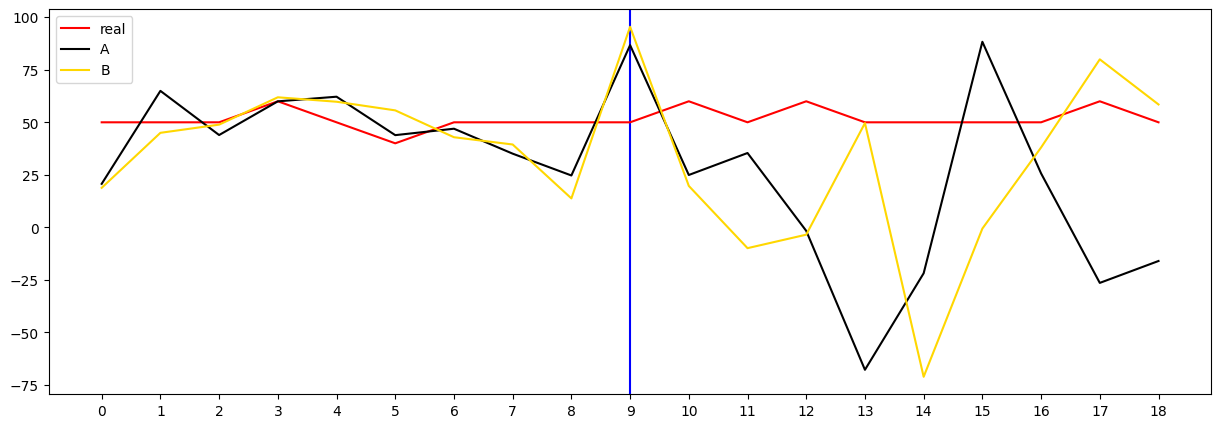

Which prediction is better? (A/B/skip): s


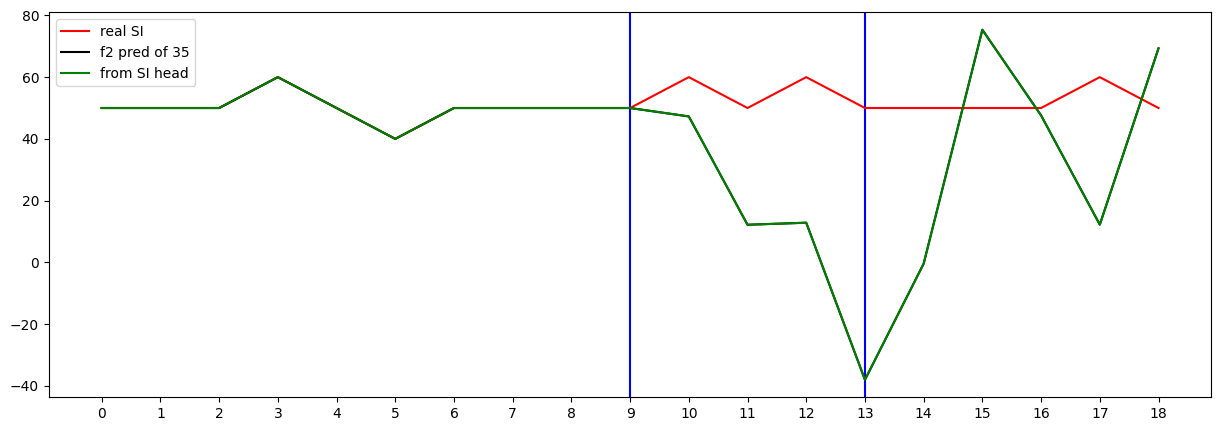

Testing R**2 - (all) - (no inputs):  0.990183012786147
Testing R**2 - (f2) - SI full (no inputs):  -105.52840469518644
Testing R**2 - SI head only (no inputs):  -105.52840469518644
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -24.995846776928076
2 ...index R**2 (no inputs):  -105.52840469518644
3 ...index R**2 (no inputs):  -15085.15429970159
4 ...index R**2 (no inputs):  -111.85955552866692
5 ...index R**2 (no inputs):  -1062.9094475859804
6 ...index R**2 (no inputs):  -386.0104814037159
7 ...index R**2 (no inputs):  -6826.092062257594
8 ...index R**2 (no inputs):  -258.9597879936408
9 ...index R**2 (no inputs):  -4484.568090305312
10 ...index R**2 (no inputs):  -57.435308003528995
11 ...index R**2 (no inputs):  -29644.90565008211
12 ...index R**2 (no inputs):  -339.62537482653414
13 ...index R**2 (no inputs):  -304.53198293060996
14 ...index R**2 (no inputs):  -5.5798355914733175
15 ...index R**2 (no inputs):  -4014.34109503684
16 ...index R**2 (no inputs):  -129.6

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.351946
Loss_SI: 1.1757999658584595 Loss_all: 1.3453973531723022
===


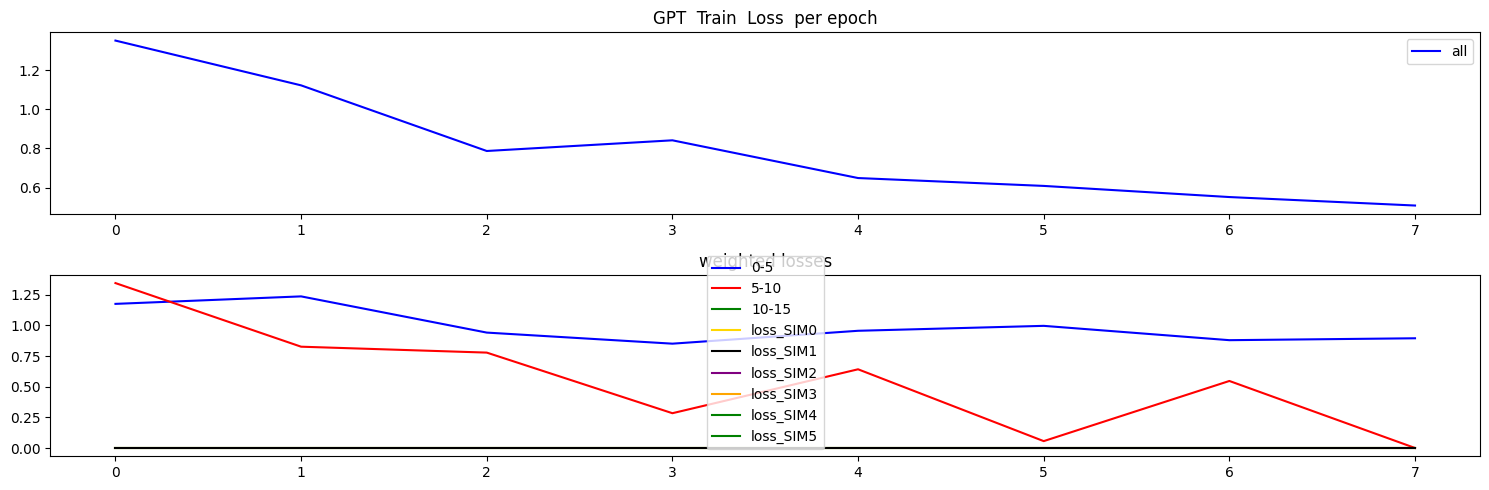

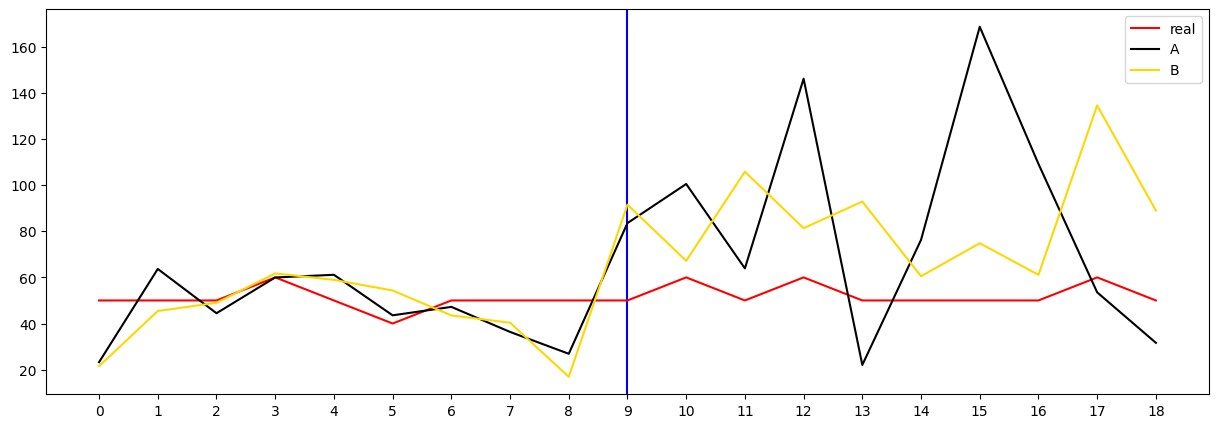

Which prediction is better? (A/B/skip): b
Saved preference.


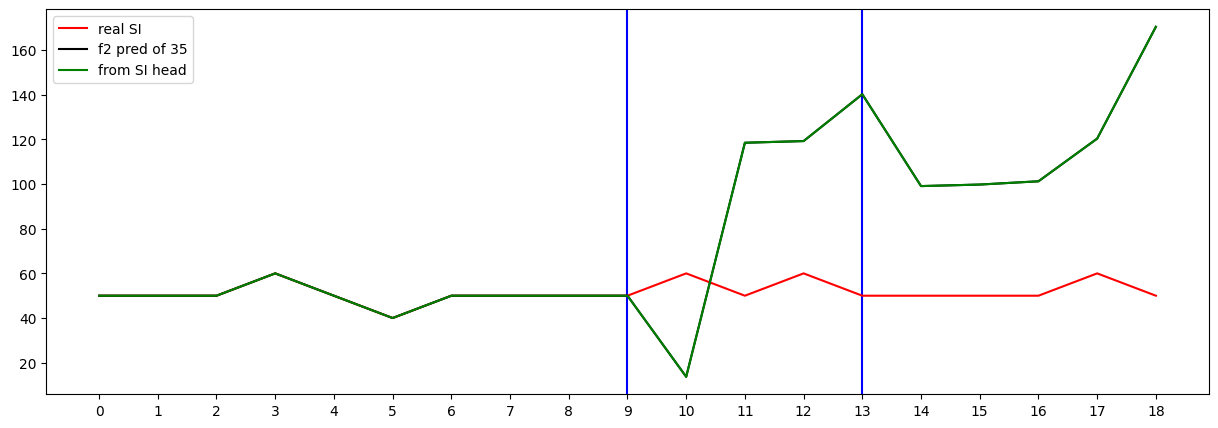

Testing R**2 - (all) - (no inputs):  0.98700932826071
Testing R**2 - (f2) - SI full (no inputs):  -280.0266150486618
Testing R**2 - SI head only (no inputs):  -280.0266150486618
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -88.62401271469814
2 ...index R**2 (no inputs):  -280.0266150486618
3 ...index R**2 (no inputs):  -882.5012802878491
4 ...index R**2 (no inputs):  -477.67983871647203
5 ...index R**2 (no inputs):  -42.039814013899786
6 ...index R**2 (no inputs):  -110.49881994354686
7 ...index R**2 (no inputs):  -3236.2096025850096
8 ...index R**2 (no inputs):  -163.39354419523403
9 ...index R**2 (no inputs):  -99.2307038281603
10 ...index R**2 (no inputs):  -109.72034748578567
11 ...index R**2 (no inputs):  -4904.631357533333
12 ...index R**2 (no inputs):  -392.0967770541031
13 ...index R**2 (no inputs):  -103.77507062470627
14 ...index R**2 (no inputs):  -57.030468949256615
15 ...index R**2 (no inputs):  -203.95510132036483
16 ...index R**2 (no inputs):  -54.1844

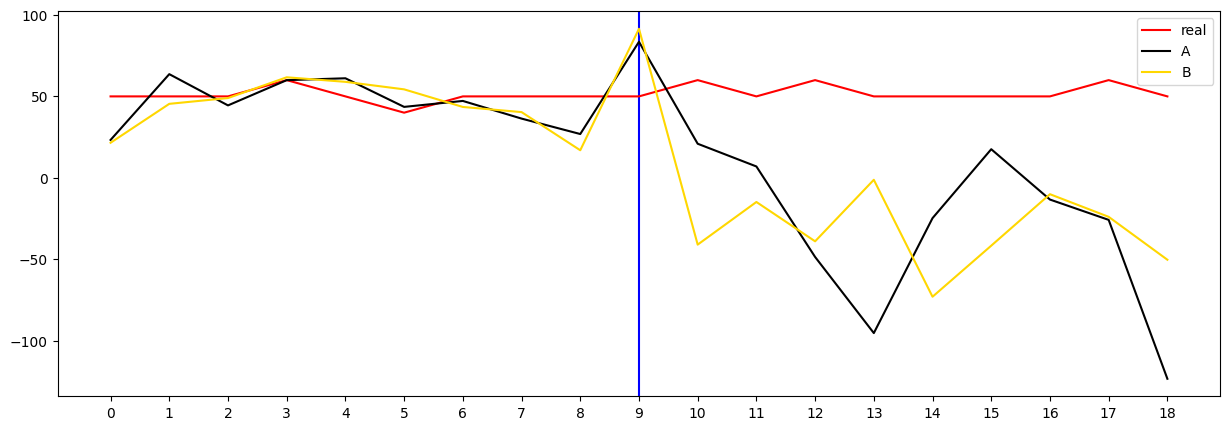

Which prediction is better? (A/B/skip): s


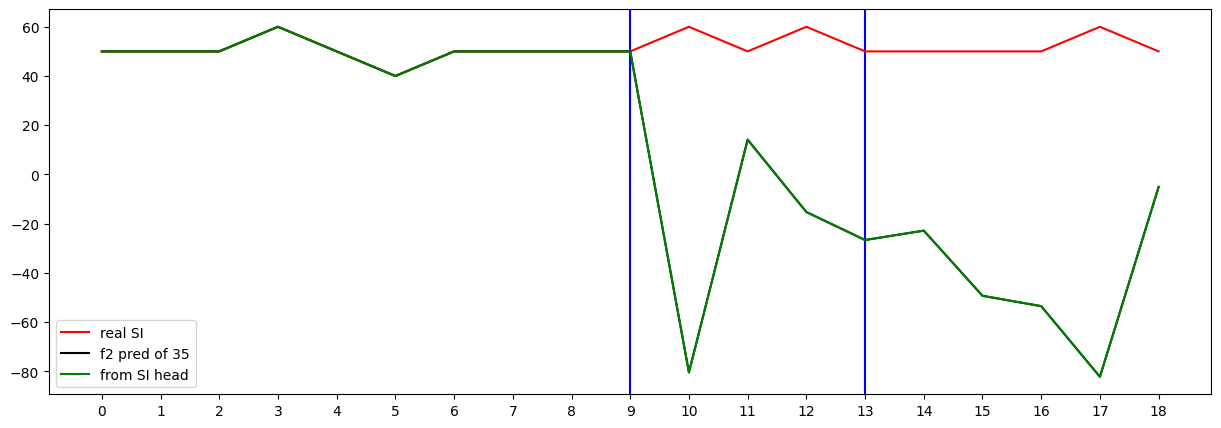

Testing R**2 - (all) - (no inputs):  0.9788569163399135
Testing R**2 - (f2) - SI full (no inputs):  -498.9231655677876
Testing R**2 - SI head only (no inputs):  -498.9231655677876
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -22.569409650231254
2 ...index R**2 (no inputs):  -498.9231655677876
3 ...index R**2 (no inputs):  -4894.490107151295
4 ...index R**2 (no inputs):  -33.78068258422533
5 ...index R**2 (no inputs):  -1170.251820265764
6 ...index R**2 (no inputs):  -142.87853996041386
7 ...index R**2 (no inputs):  -614.7884034491382
8 ...index R**2 (no inputs):  -74.35468385472126
9 ...index R**2 (no inputs):  -2577.446120555885
10 ...index R**2 (no inputs):  -50.18871082990015
11 ...index R**2 (no inputs):  -34142.82311215957
12 ...index R**2 (no inputs):  -142.39037778747942
13 ...index R**2 (no inputs):  -161.58609162650282
14 ...index R**2 (no inputs):  -30.608676569622183
15 ...index R**2 (no inputs):  -2461.5998098068862
16 ...index R**2 (no inputs):  -528.479

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




## Run 2


In [37]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.333925
Loss_SI: 1.2429511547088623 Loss_all: 1.3272477388381958
===


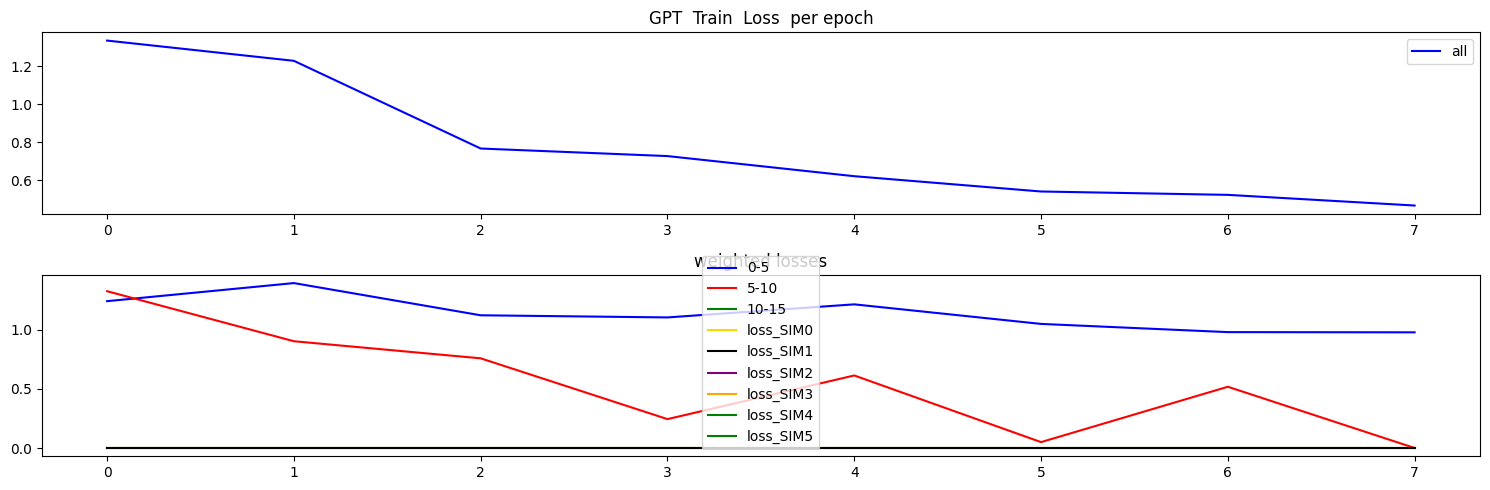

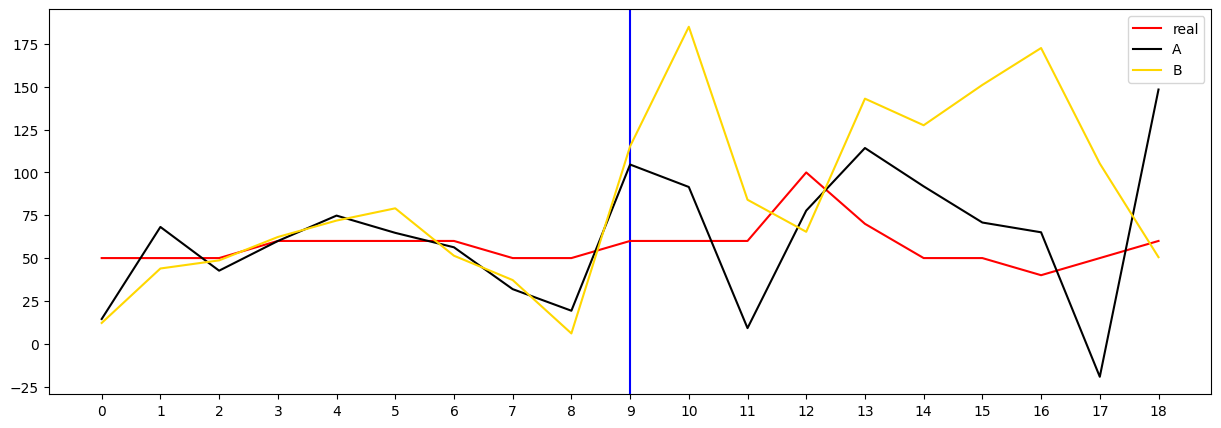

Which prediction is better? (A/B/skip): s


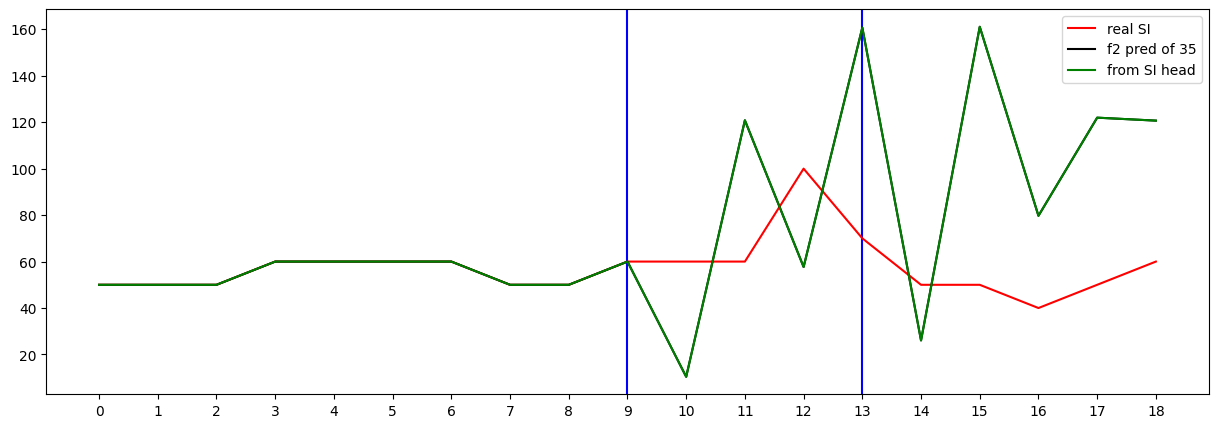

Testing R**2 - (all) - (no inputs):  0.9892102380158376
Testing R**2 - (f2) - SI full (no inputs):  -15.172069034525393
Testing R**2 - SI head only (no inputs):  -15.172069034525393
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -29.24077624444164
2 ...index R**2 (no inputs):  -15.172069034525393
3 ...index R**2 (no inputs):  -84.97368559678766
4 ...index R**2 (no inputs):  -51.49652396020541
5 ...index R**2 (no inputs):  -31.007728223021985
6 ...index R**2 (no inputs):  -27.450372505653824
7 ...index R**2 (no inputs):  -151.68127887283765
8 ...index R**2 (no inputs):  -0.9097874155904844
9 ...index R**2 (no inputs):  -4.759692830709694
10 ...index R**2 (no inputs):  -7.505298777020039
11 ...index R**2 (no inputs):  -8.397951735381106
12 ...index R**2 (no inputs):  -26.976339714429713
13 ...index R**2 (no inputs):  -14.208138945304547
14 ...index R**2 (no inputs):  -14.710812695056822
15 ...index R**2 (no inputs):  -171.7459417469335
16 ...index R**2 (no inputs):  -59.

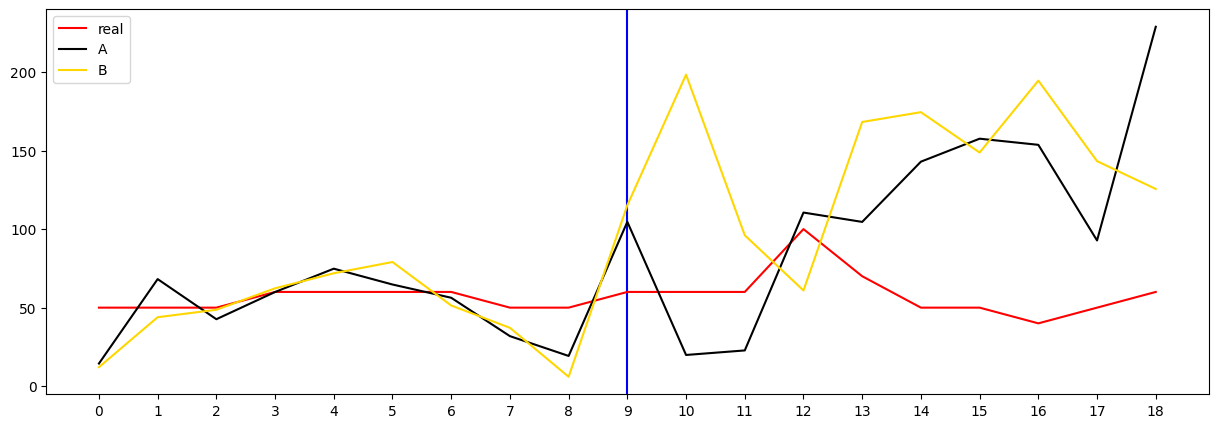

Which prediction is better? (A/B/skip): a
Saved preference.


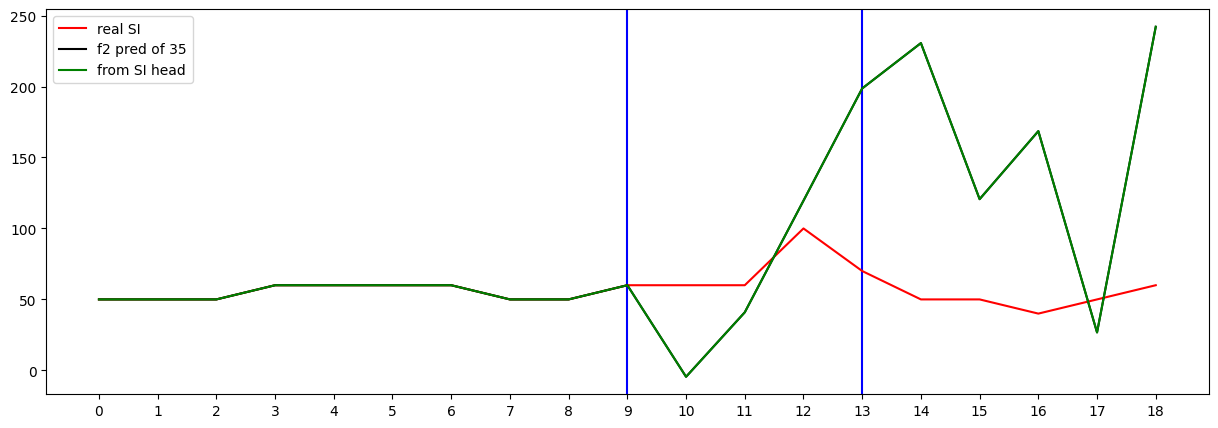

Testing R**2 - (all) - (no inputs):  0.9695030254574578
Testing R**2 - (f2) - SI full (no inputs):  -48.58490801868255
Testing R**2 - SI head only (no inputs):  -48.58490801868255
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -185.70513005569762
2 ...index R**2 (no inputs):  -48.58490801868255
3 ...index R**2 (no inputs):  -737.5669155934354
4 ...index R**2 (no inputs):  -17.030550690146494
5 ...index R**2 (no inputs):  -33.37656183502472
6 ...index R**2 (no inputs):  -70.81093354191869
7 ...index R**2 (no inputs):  -106.61849141090178
8 ...index R**2 (no inputs):  -3.4338449006354734
9 ...index R**2 (no inputs):  -65.68683831032855
10 ...index R**2 (no inputs):  -13.440401797264103
11 ...index R**2 (no inputs):  -34.22227807918405
12 ...index R**2 (no inputs):  -60.95892569544378
13 ...index R**2 (no inputs):  -293.28246211916735
14 ...index R**2 (no inputs):  -22.25327090912315
15 ...index R**2 (no inputs):  -316.86235645389525
16 ...index R**2 (no inputs):  -82.449

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.308896
Loss_SI: 1.1847084760665894 Loss_all: 1.3022077083587646
===


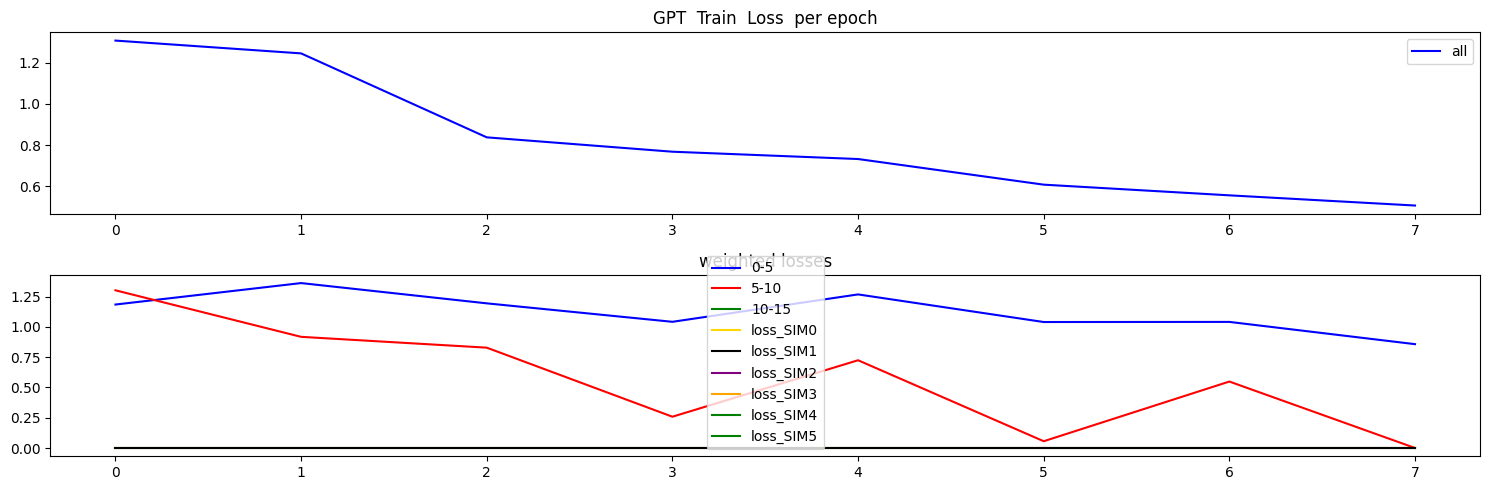

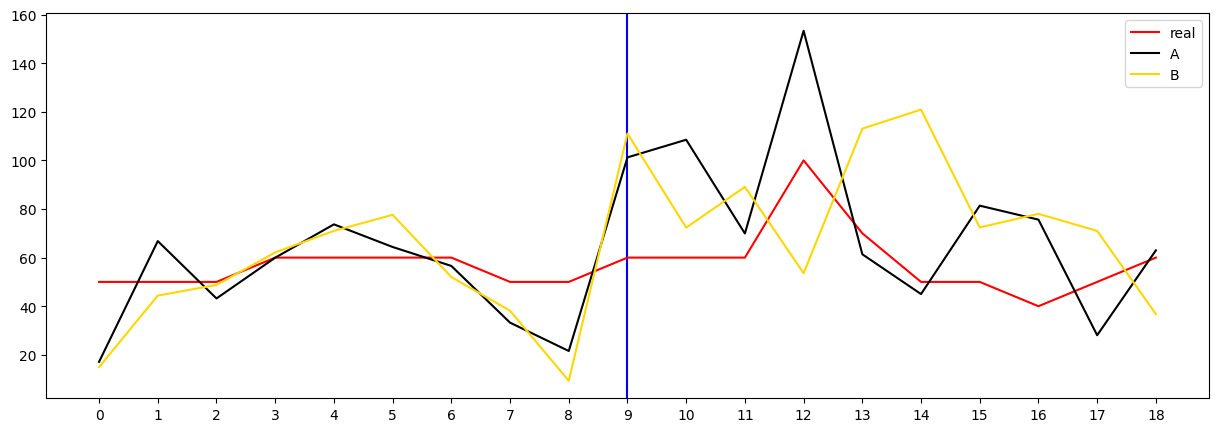

Which prediction is better? (A/B/skip): s


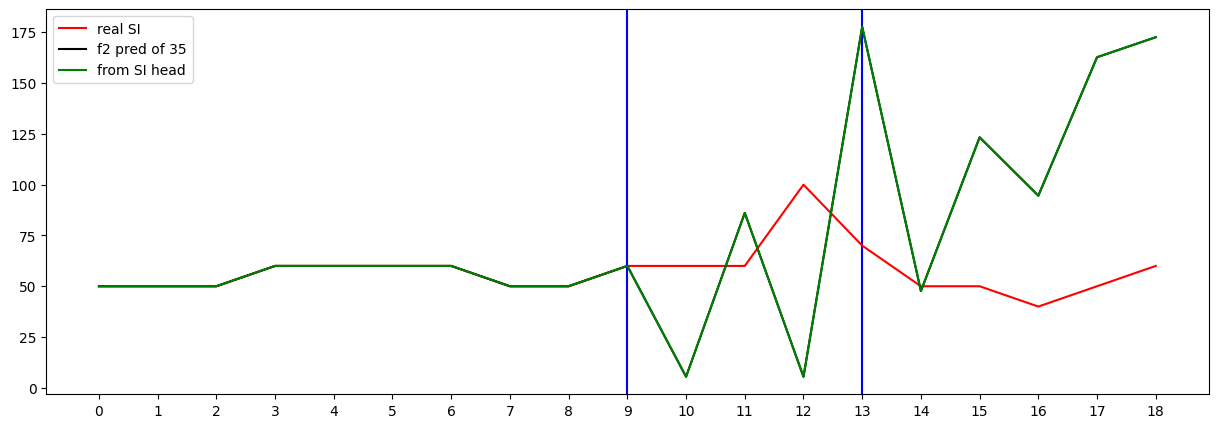

Testing R**2 - (all) - (no inputs):  0.9848325429726811
Testing R**2 - (f2) - SI full (no inputs):  -22.361804376631415
Testing R**2 - SI head only (no inputs):  -22.361804376631415
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -46.132478089977425
2 ...index R**2 (no inputs):  -22.361804376631415
3 ...index R**2 (no inputs):  -48.51667589324931
4 ...index R**2 (no inputs):  -22.977278327288175
5 ...index R**2 (no inputs):  -115.82209465314155
6 ...index R**2 (no inputs):  -70.86524063575783
7 ...index R**2 (no inputs):  -1781.4470890400014
8 ...index R**2 (no inputs):  -4.5834253138678855
9 ...index R**2 (no inputs):  -256.4741034214605
10 ...index R**2 (no inputs):  -4.2035755158775645
11 ...index R**2 (no inputs):  -4.778536966026486
12 ...index R**2 (no inputs):  -41.93355264270536
13 ...index R**2 (no inputs):  -5.77470464533663
14 ...index R**2 (no inputs):  -16.405132932602406
15 ...index R**2 (no inputs):  -2356.241392324748
16 ...index R**2 (no inputs):  -38.2

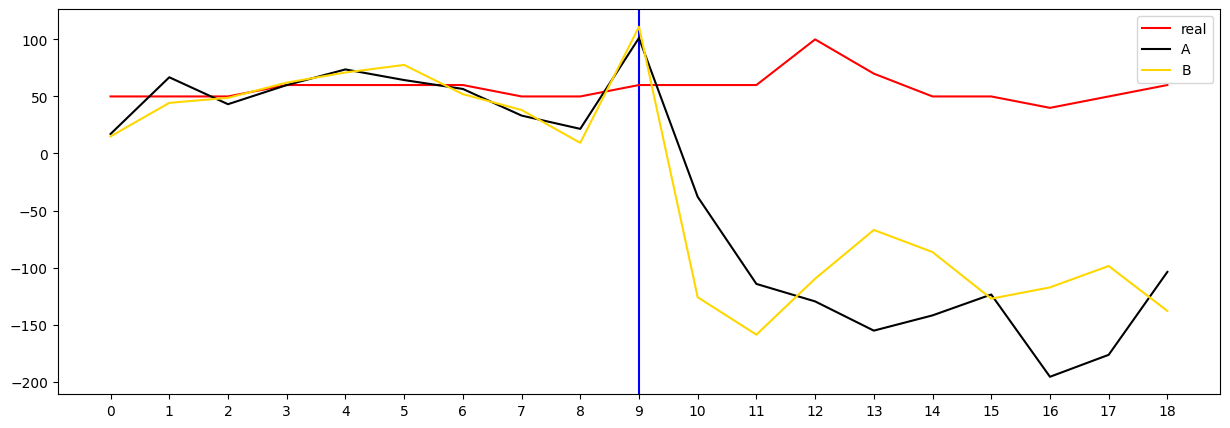

Which prediction is better? (A/B/skip): s


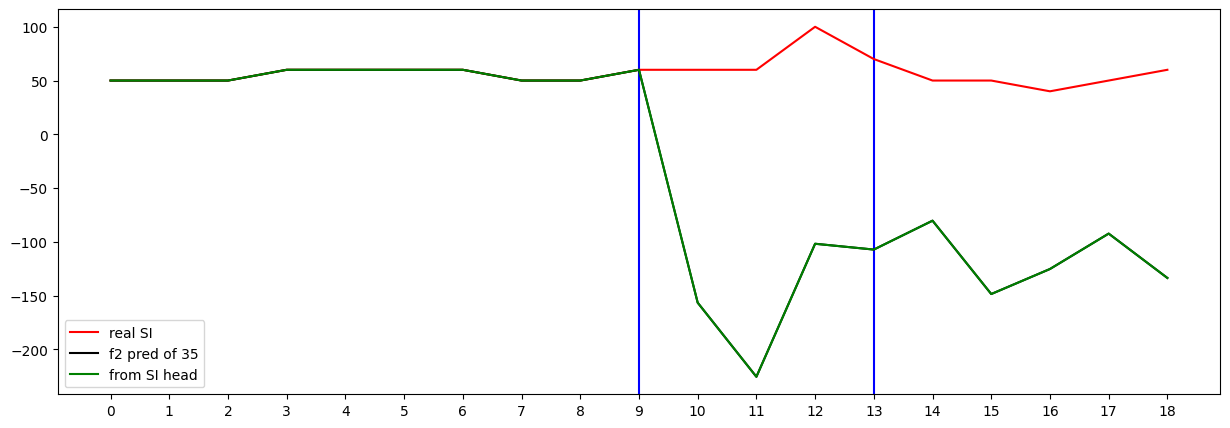

Testing R**2 - (all) - (no inputs):  0.9197835516772997
Testing R**2 - (f2) - SI full (no inputs):  -138.4713372241934
Testing R**2 - SI head only (no inputs):  -138.4713372241934
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -50.57538511569437
2 ...index R**2 (no inputs):  -138.4713372241934
3 ...index R**2 (no inputs):  -68.7362688316886
4 ...index R**2 (no inputs):  -47.91476002374267
5 ...index R**2 (no inputs):  -25.975111482617514
6 ...index R**2 (no inputs):  -233.61731966484734
7 ...index R**2 (no inputs):  -251.85113949883583
8 ...index R**2 (no inputs):  -50.610037882023704
9 ...index R**2 (no inputs):  -83.30206888088208
10 ...index R**2 (no inputs):  -90.95277540080373
11 ...index R**2 (no inputs):  -26.96926326369123
12 ...index R**2 (no inputs):  -19.261812126102996
13 ...index R**2 (no inputs):  -67.4802304302611
14 ...index R**2 (no inputs):  -798.5754051734255
15 ...index R**2 (no inputs):  -1598.2377423749474
16 ...index R**2 (no inputs):  -408.58635

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.371062
Loss_SI: 1.3917042016983032 Loss_all: 1.3644750118255615
===


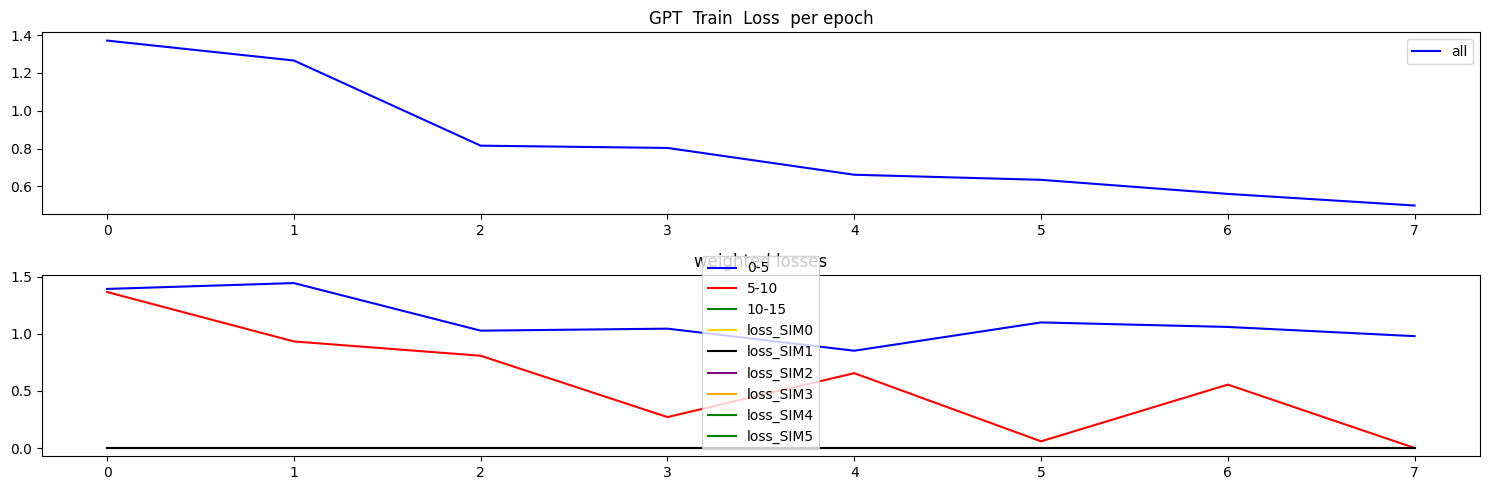

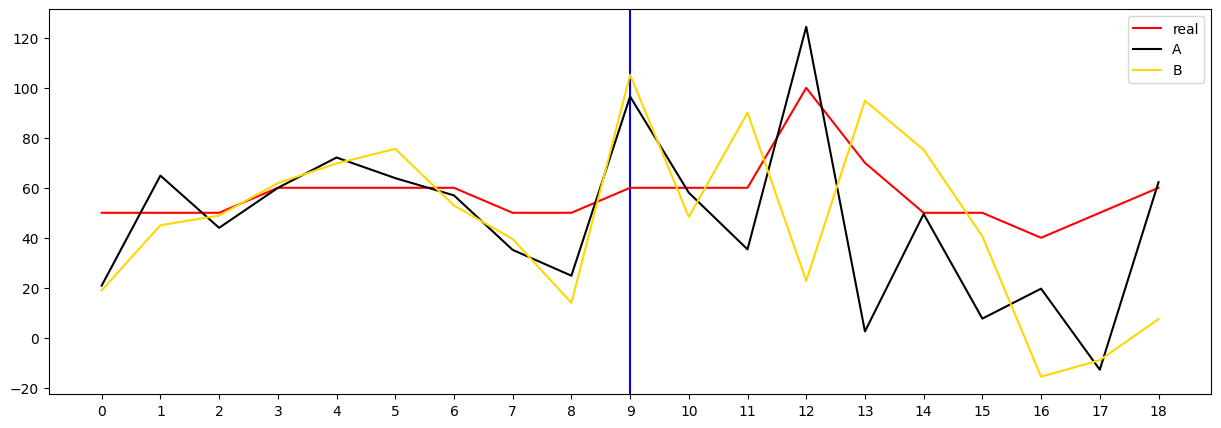

Which prediction is better? (A/B/skip): s


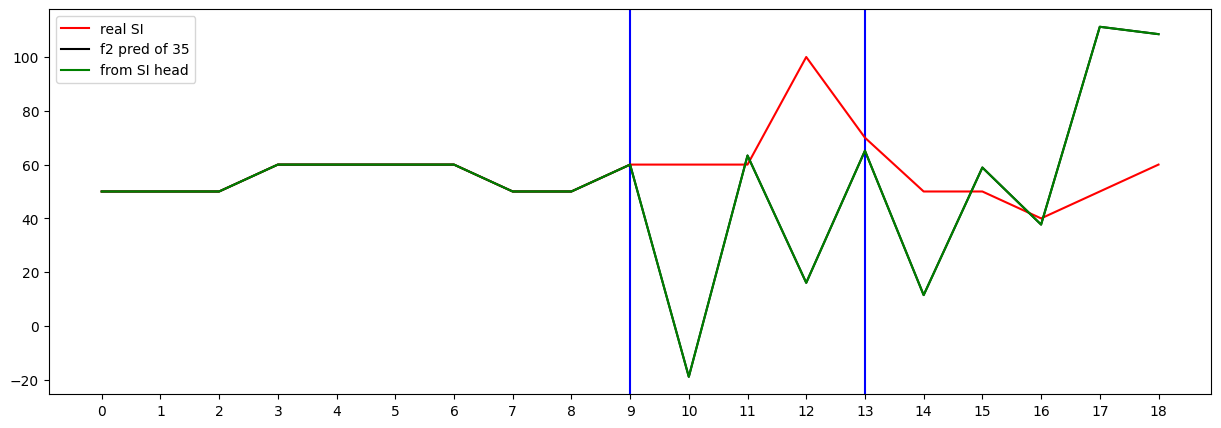

Testing R**2 - (all) - (no inputs):  0.9940320141517429
Testing R**2 - (f2) - SI full (no inputs):  -6.530489292916457
Testing R**2 - SI head only (no inputs):  -6.530489292916457
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -10.464746516349432
2 ...index R**2 (no inputs):  -6.530489292916457
3 ...index R**2 (no inputs):  -52.91295304542706
4 ...index R**2 (no inputs):  -34.0109772299331
5 ...index R**2 (no inputs):  -87.55388492505088
6 ...index R**2 (no inputs):  -126.87504312315153
7 ...index R**2 (no inputs):  -135.9007496332507
8 ...index R**2 (no inputs):  -24.51877897545354
9 ...index R**2 (no inputs):  -271.93885084958197
10 ...index R**2 (no inputs):  -4.578058978350691
11 ...index R**2 (no inputs):  -4.535066285824898
12 ...index R**2 (no inputs):  -3.707019870413294
13 ...index R**2 (no inputs):  -7.96551087353318
14 ...index R**2 (no inputs):  -67.68190943554168
15 ...index R**2 (no inputs):  -158.8422541003535
16 ...index R**2 (no inputs):  -30.969302440

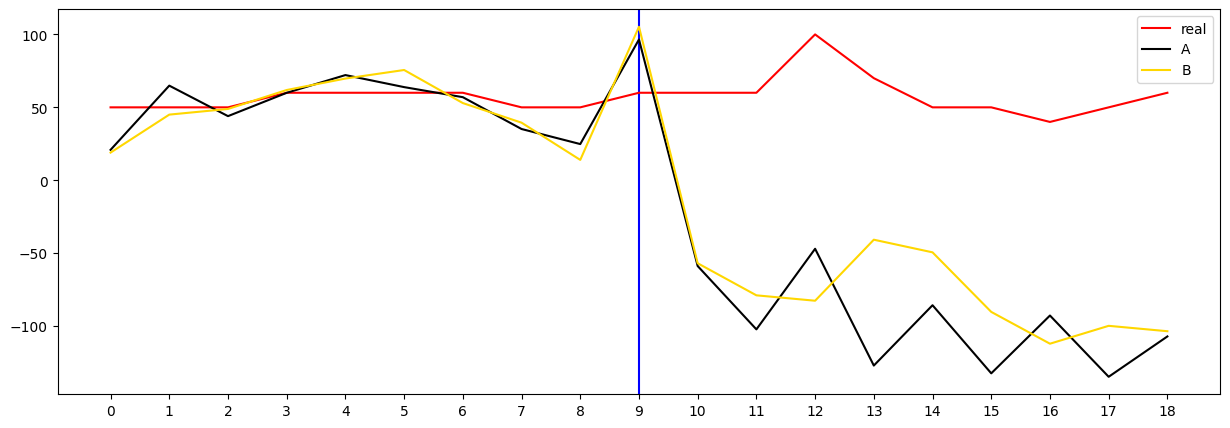

Which prediction is better? (A/B/skip): b
Saved preference.


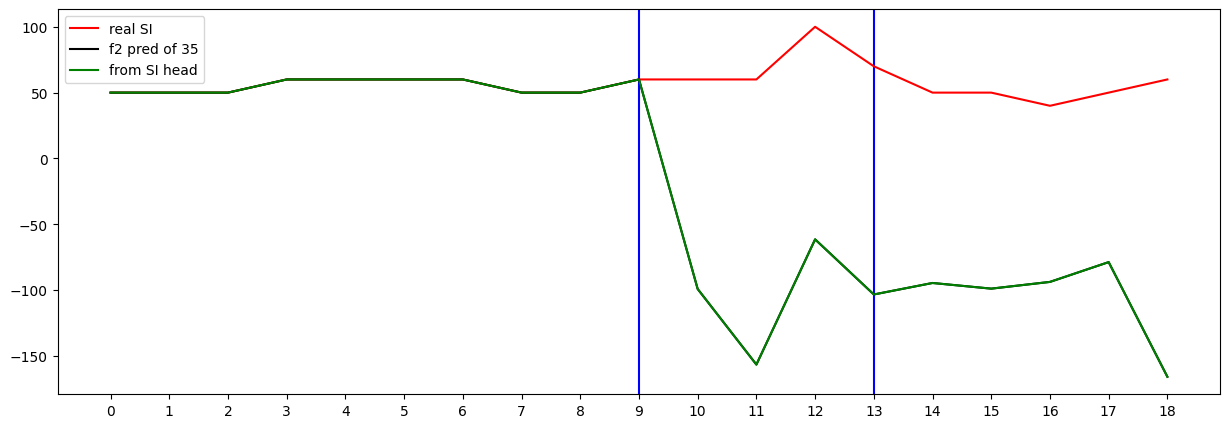

Testing R**2 - (all) - (no inputs):  0.9378422198821075
Testing R**2 - (f2) - SI full (no inputs):  -102.87399444033358
Testing R**2 - SI head only (no inputs):  -102.87399444033358
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -189.4747539429477
2 ...index R**2 (no inputs):  -102.87399444033358
3 ...index R**2 (no inputs):  -406.4059981910617
4 ...index R**2 (no inputs):  -23.29223633271521
5 ...index R**2 (no inputs):  -227.00868834184487
6 ...index R**2 (no inputs):  -167.43857090087363
7 ...index R**2 (no inputs):  -82.40549979448726
8 ...index R**2 (no inputs):  -42.148487993974385
9 ...index R**2 (no inputs):  -59.98539584590001
10 ...index R**2 (no inputs):  -79.08079371418386
11 ...index R**2 (no inputs):  -16.733190645657515
12 ...index R**2 (no inputs):  -120.2252164151691
13 ...index R**2 (no inputs):  -4.9697561100308345
14 ...index R**2 (no inputs):  -358.7811402085412
15 ...index R**2 (no inputs):  -6019.958384813477
16 ...index R**2 (no inputs):  -103.4

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



[0] Train Loss: 1.327818
Loss_SI: 1.474597692489624 Loss_all: 1.3212060928344727
===


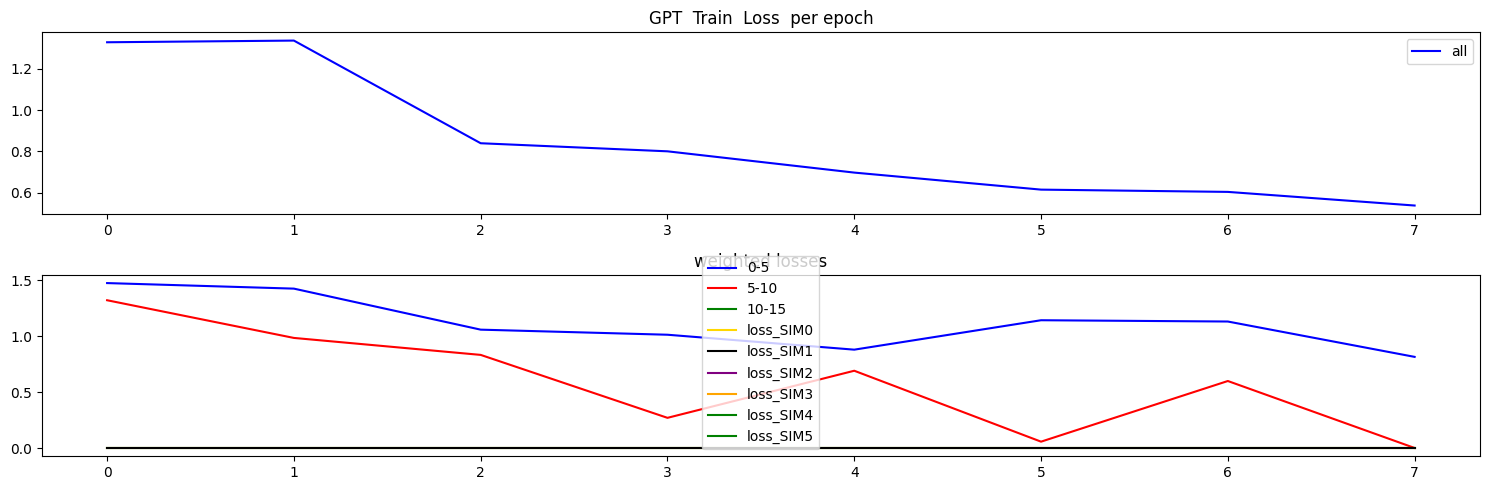

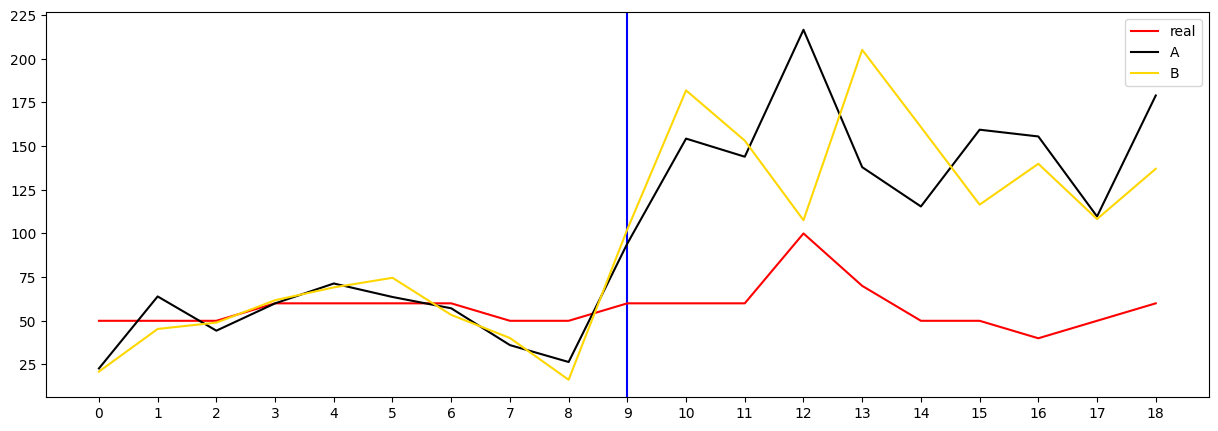

Which prediction is better? (A/B/skip): s


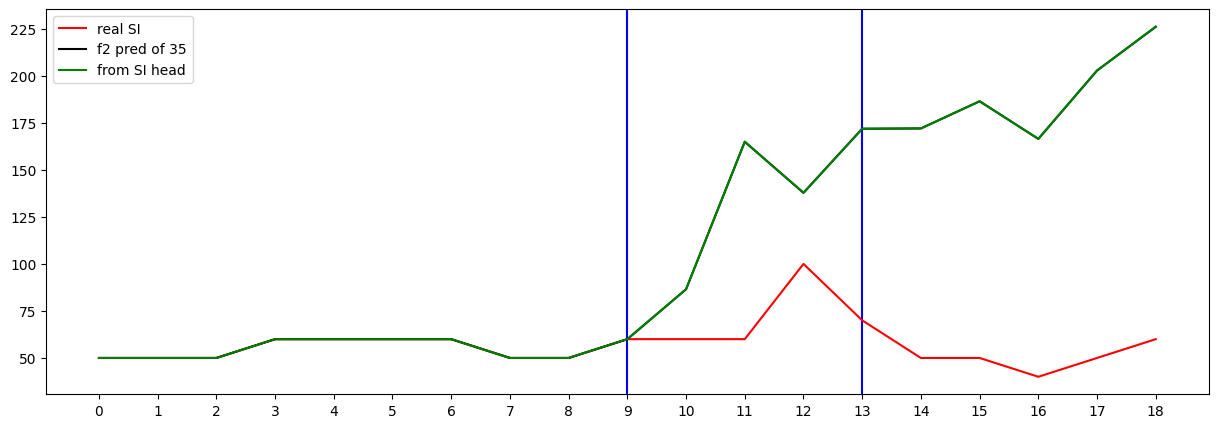

Testing R**2 - (all) - (no inputs):  0.9702465406913163
Testing R**2 - (f2) - SI full (no inputs):  -49.50236409486001
Testing R**2 - SI head only (no inputs):  -49.50236409486001
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -41.24870603080935
2 ...index R**2 (no inputs):  -49.50236409486001
3 ...index R**2 (no inputs):  -833.9861652222241
4 ...index R**2 (no inputs):  -14.816682079709555
5 ...index R**2 (no inputs):  -44.86210428243146
6 ...index R**2 (no inputs):  -19.198844332972463
7 ...index R**2 (no inputs):  -92.92225095063036
8 ...index R**2 (no inputs):  -21.278691520422903
9 ...index R**2 (no inputs):  -9.63453801689515
10 ...index R**2 (no inputs):  -14.012771989366152
11 ...index R**2 (no inputs):  -2.428827400864157
12 ...index R**2 (no inputs):  -32.30748001074975
13 ...index R**2 (no inputs):  -3.9406311224315154
14 ...index R**2 (no inputs):  -129.26107290496986
15 ...index R**2 (no inputs):  -372.88207877609125
16 ...index R**2 (no inputs):  -17.2985

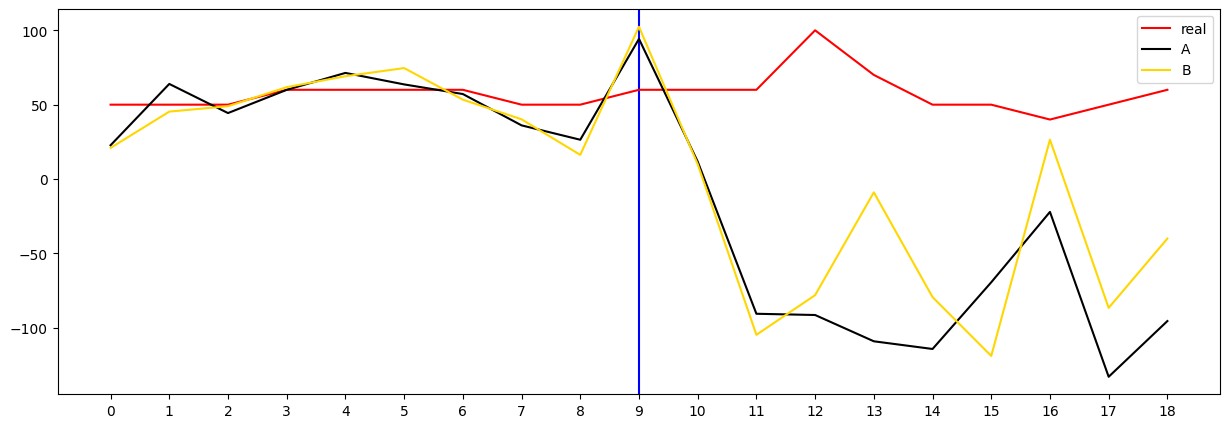

Which prediction is better? (A/B/skip): b
Saved preference.


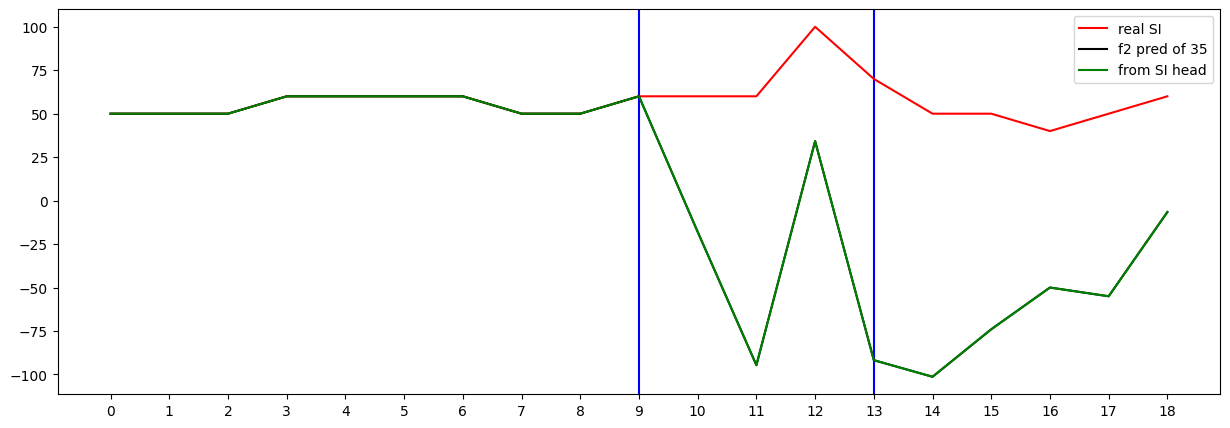

Testing R**2 - (all) - (no inputs):  0.9666440557894603
Testing R**2 - (f2) - SI full (no inputs):  -50.31238269981513
Testing R**2 - SI head only (no inputs):  -50.31238269981513
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -608.1588212964455
2 ...index R**2 (no inputs):  -50.31238269981513
3 ...index R**2 (no inputs):  -3819.634472413708
4 ...index R**2 (no inputs):  -22.548896436113974
5 ...index R**2 (no inputs):  -1402.5811765017543
6 ...index R**2 (no inputs):  -53.89391978384096
7 ...index R**2 (no inputs):  -600.1710481049217
8 ...index R**2 (no inputs):  -66.8481222335477
9 ...index R**2 (no inputs):  -941.5060341650075
10 ...index R**2 (no inputs):  -26.98289526266328
11 ...index R**2 (no inputs):  -18.187129233714934
12 ...index R**2 (no inputs):  -10.319657174418243
13 ...index R**2 (no inputs):  -153.22586075714278
14 ...index R**2 (no inputs):  -70.8692878695158
15 ...index R**2 (no inputs):  -14001.081505484208
16 ...index R**2 (no inputs):  -82.821034

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.341532
Loss_SI: 1.1992148160934448 Loss_all: 1.3350971937179565
===


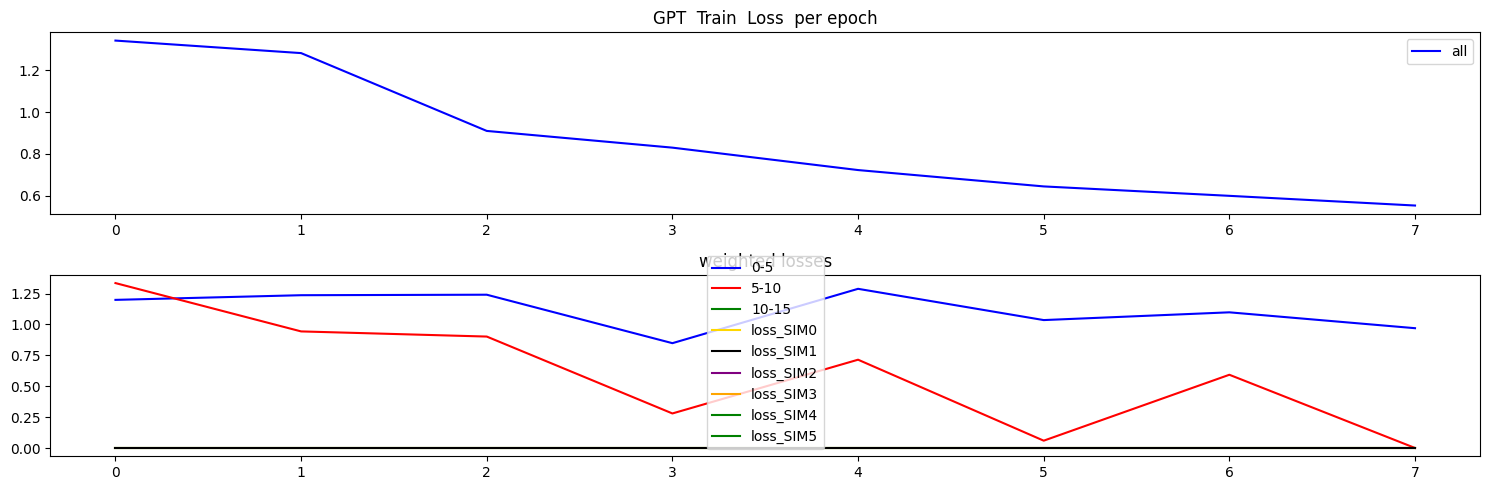

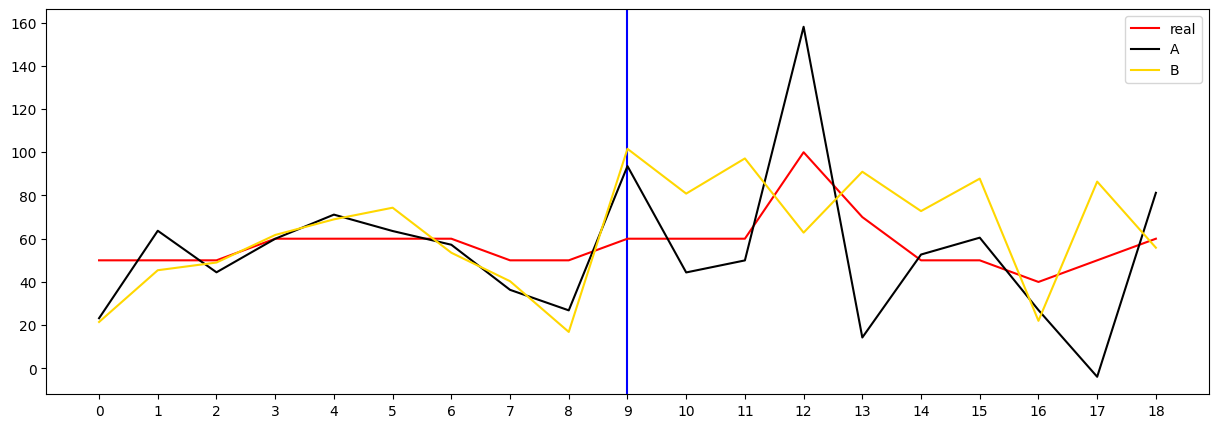

Which prediction is better? (A/B/skip): s


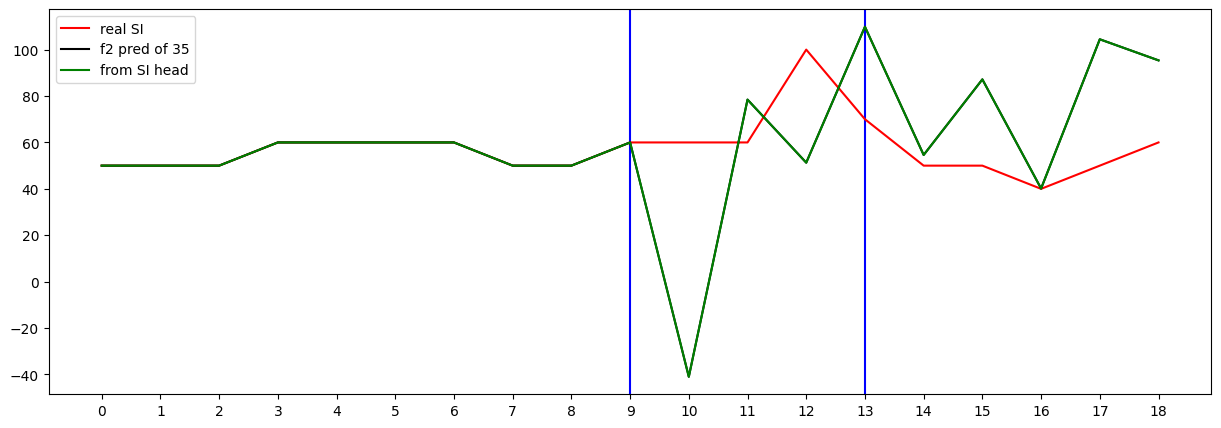

Testing R**2 - (all) - (no inputs):  0.9934583412823447
Testing R**2 - (f2) - SI full (no inputs):  -7.426102779173684
Testing R**2 - SI head only (no inputs):  -7.426102779173684
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -21.621012864337327
2 ...index R**2 (no inputs):  -7.426102779173684
3 ...index R**2 (no inputs):  -380.1146297257144
4 ...index R**2 (no inputs):  -63.95779225111336
5 ...index R**2 (no inputs):  -56.7329176634742
6 ...index R**2 (no inputs):  -169.08117001732495
7 ...index R**2 (no inputs):  -331.7180130333556
8 ...index R**2 (no inputs):  -2.325623629259116
9 ...index R**2 (no inputs):  -17.582552078560354
10 ...index R**2 (no inputs):  -14.305358682217939
11 ...index R**2 (no inputs):  -10.81954296427562
12 ...index R**2 (no inputs):  -0.4102718537436225
13 ...index R**2 (no inputs):  -4.626445368521485
14 ...index R**2 (no inputs):  -424.9887262785124
15 ...index R**2 (no inputs):  -302.7644051817138
16 ...index R**2 (no inputs):  -33.530528

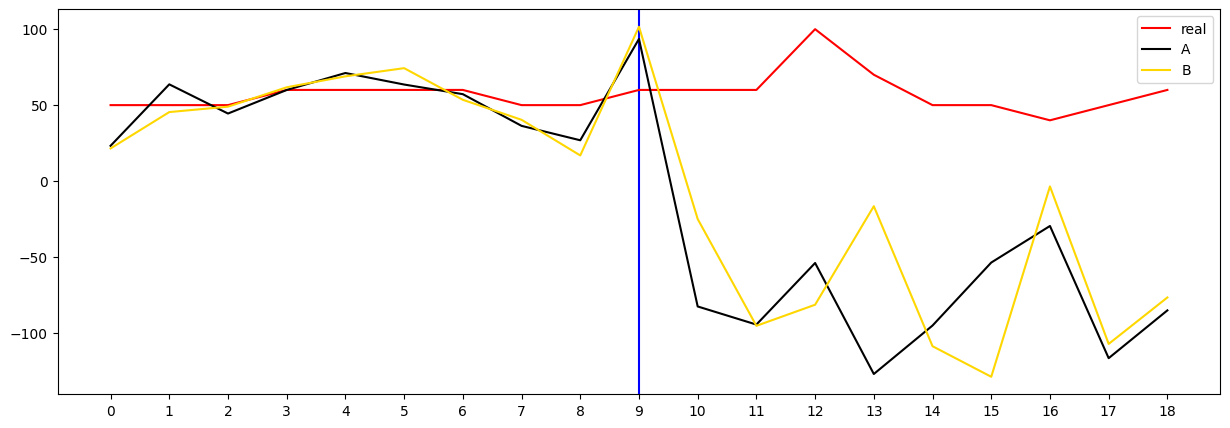

Which prediction is better? (A/B/skip): b
Saved preference.


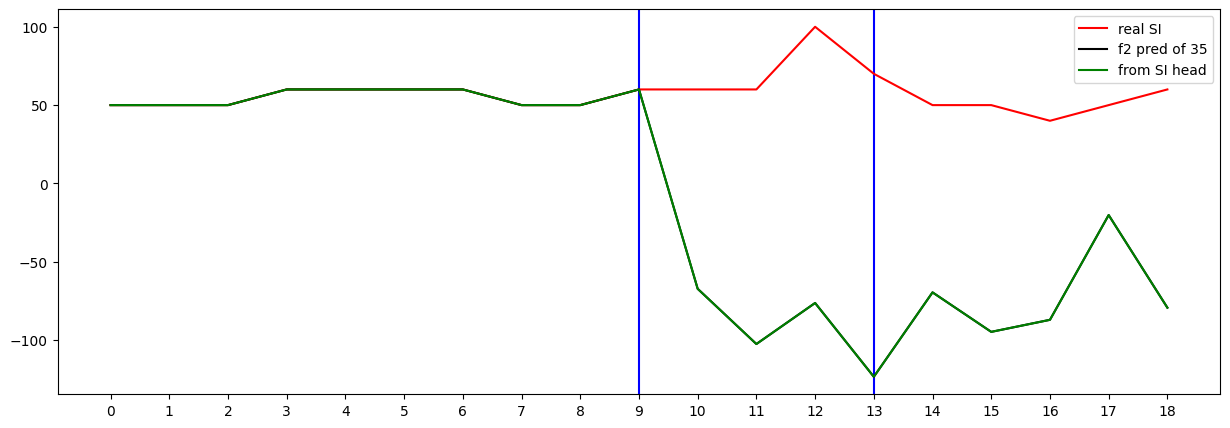

Testing R**2 - (all) - (no inputs):  0.9558510063306797
Testing R**2 - (f2) - SI full (no inputs):  -72.5381281462126
Testing R**2 - SI head only (no inputs):  -72.5381281462126
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -1582.8604171794027
2 ...index R**2 (no inputs):  -72.5381281462126
3 ...index R**2 (no inputs):  -2040.5782130248724
4 ...index R**2 (no inputs):  -43.79022622487318
5 ...index R**2 (no inputs):  -604.317206044288
6 ...index R**2 (no inputs):  -371.2688854020757
7 ...index R**2 (no inputs):  -277.5355737273244
8 ...index R**2 (no inputs):  -103.53659565157217
9 ...index R**2 (no inputs):  -1288.2319921709136
10 ...index R**2 (no inputs):  -3.780576552550733
11 ...index R**2 (no inputs):  -14.366498177882402
12 ...index R**2 (no inputs):  -10.022572529675285
13 ...index R**2 (no inputs):  -144.00747007411238
14 ...index R**2 (no inputs):  -64.25904788357005
15 ...index R**2 (no inputs):  -4869.497259084706
16 ...index R**2 (no inputs):  -24.8204765

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




## Run 3


In [43]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.338211
Loss_SI: 1.2977570295333862 Loss_all: 1.3315401077270508
===


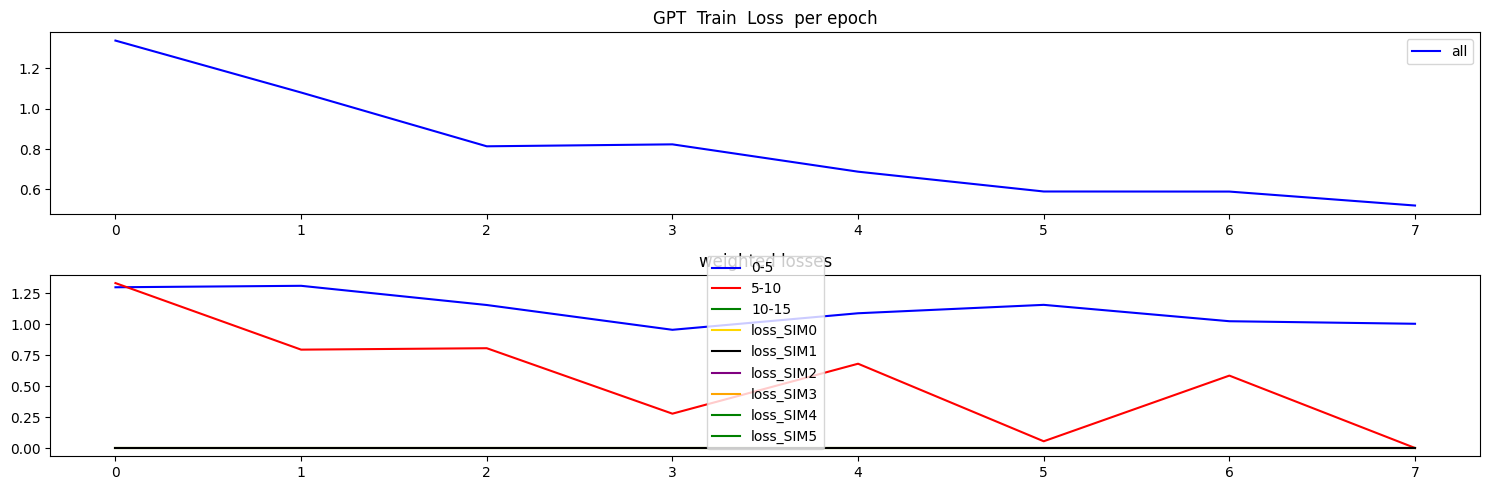

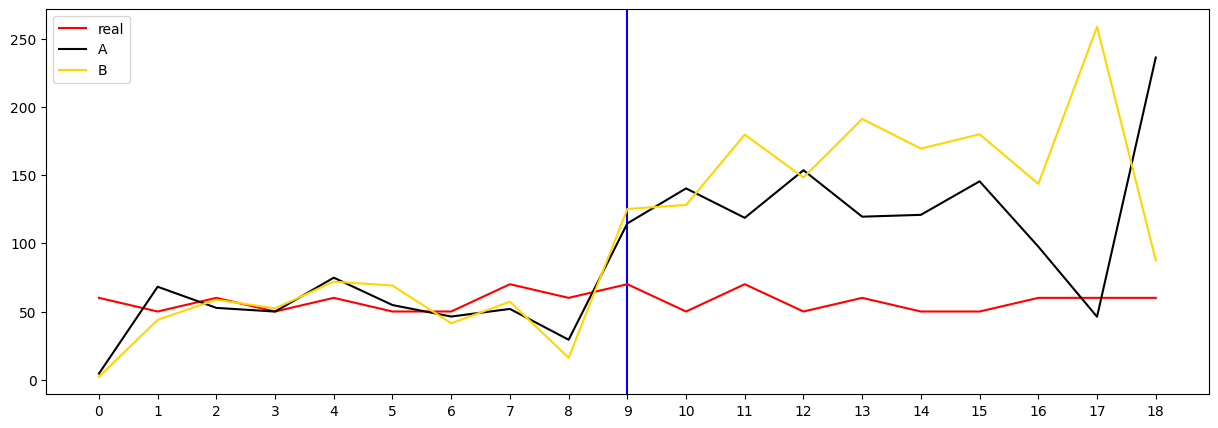

Which prediction is better? (A/B/skip): a
Saved preference.


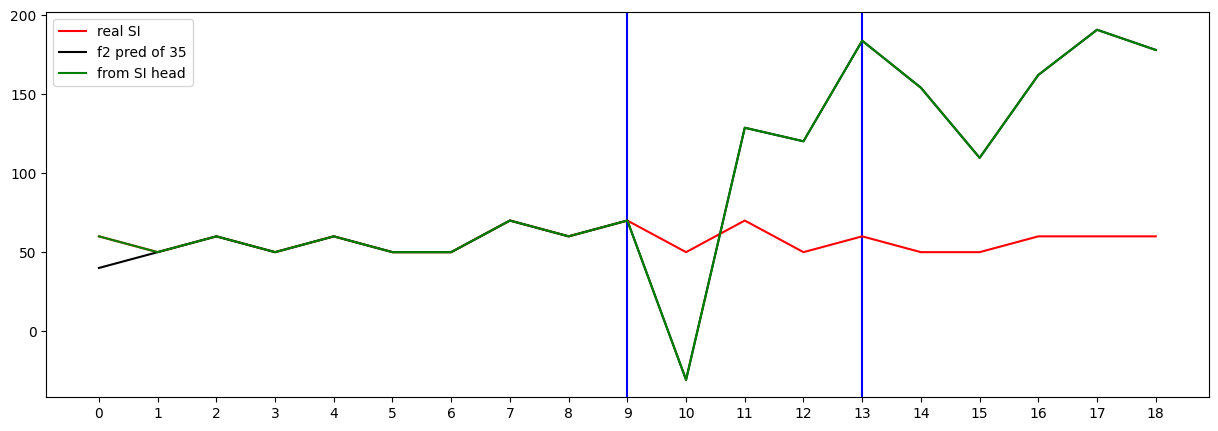

Testing R**2 - (all) - (no inputs):  0.9769758607742782
Testing R**2 - (f2) - SI full (no inputs):  -259.29647837776173
Testing R**2 - SI head only (no inputs):  -259.29647837776173
0 ...index R**2 (no inputs):  0.3118880106438735
1 ...index R**2 (no inputs):  -176.19210104982076
2 ...index R**2 (no inputs):  -259.29647837776173
3 ...index R**2 (no inputs):  -3698.650544584367
4 ...index R**2 (no inputs):  -299.50792555118073
5 ...index R**2 (no inputs):  -2006.3199402089595
6 ...index R**2 (no inputs):  -45.6342281734935
7 ...index R**2 (no inputs):  -764.9911535397891
8 ...index R**2 (no inputs):  -358.23455110473907
9 ...index R**2 (no inputs):  -35.74393873684651
10 ...index R**2 (no inputs):  -37.089694453888406
11 ...index R**2 (no inputs):  -395.41409326112785
12 ...index R**2 (no inputs):  -208.57030991076533
13 ...index R**2 (no inputs):  -657.7605284125107
14 ...index R**2 (no inputs):  -95.90969466164064
15 ...index R**2 (no inputs):  -1027.339123386834
16 ...index R**2 (no 

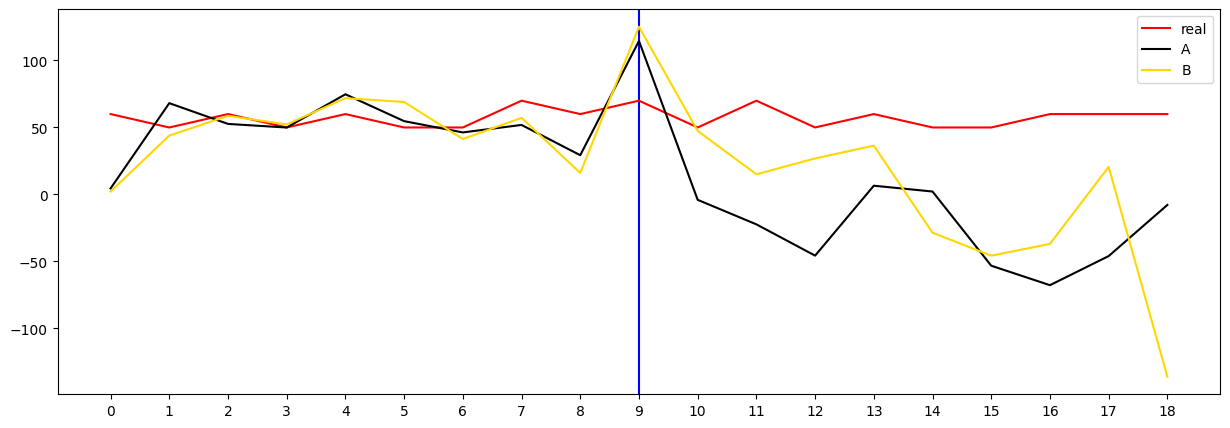

Which prediction is better? (A/B/skip): b
Saved preference.


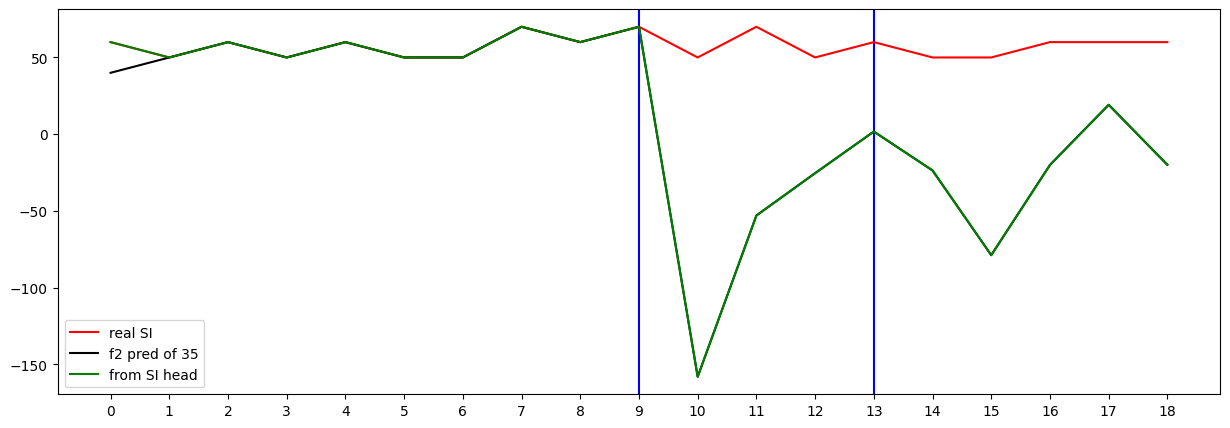

Testing R**2 - (all) - (no inputs):  0.9739133543382842
Testing R**2 - (f2) - SI full (no inputs):  -312.4581339362339
Testing R**2 - SI head only (no inputs):  -312.4581339362339
0 ...index R**2 (no inputs):  -0.3969725156907338
1 ...index R**2 (no inputs):  -98.81766509415512
2 ...index R**2 (no inputs):  -312.4581339362339
3 ...index R**2 (no inputs):  -1047.8238800375148
4 ...index R**2 (no inputs):  -111.4927885857856
5 ...index R**2 (no inputs):  -1610.35443053677
6 ...index R**2 (no inputs):  -23.98046563229476
7 ...index R**2 (no inputs):  -1724.930074573668
8 ...index R**2 (no inputs):  -55.605790484879584
9 ...index R**2 (no inputs):  -36.35571673535818
10 ...index R**2 (no inputs):  -288.89562476561997
11 ...index R**2 (no inputs):  -357.22618179414303
12 ...index R**2 (no inputs):  -70.95012511373481
13 ...index R**2 (no inputs):  -86.02025754697435
14 ...index R**2 (no inputs):  -7.854792082760467
15 ...index R**2 (no inputs):  -1986.9904948947878
16 ...index R**2 (no inpu

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.349558
Loss_SI: 1.3576805591583252 Loss_all: 1.3429869413375854
===


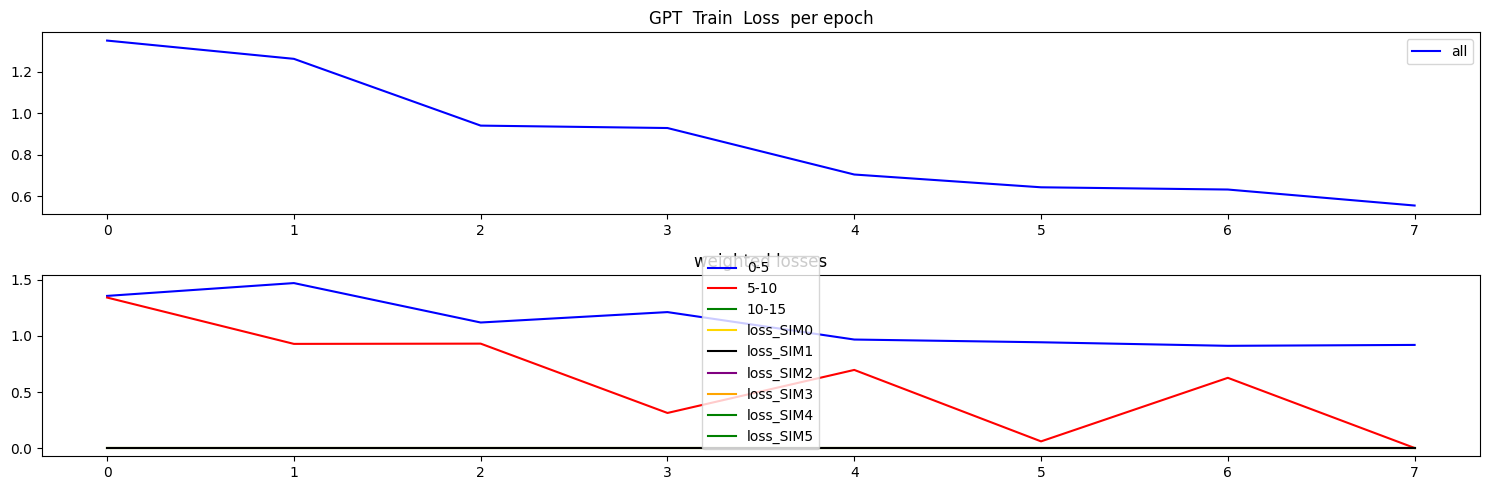

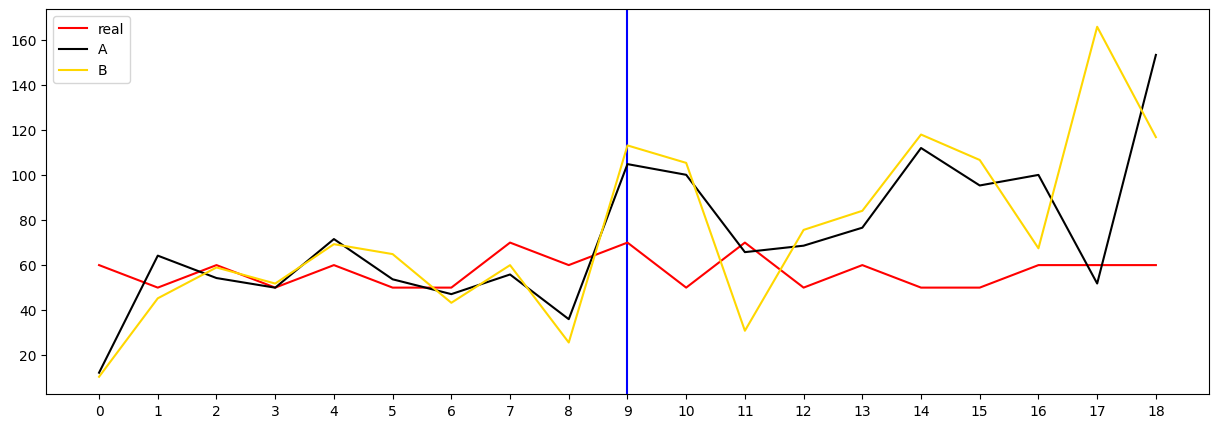

Which prediction is better? (A/B/skip): a
Saved preference.


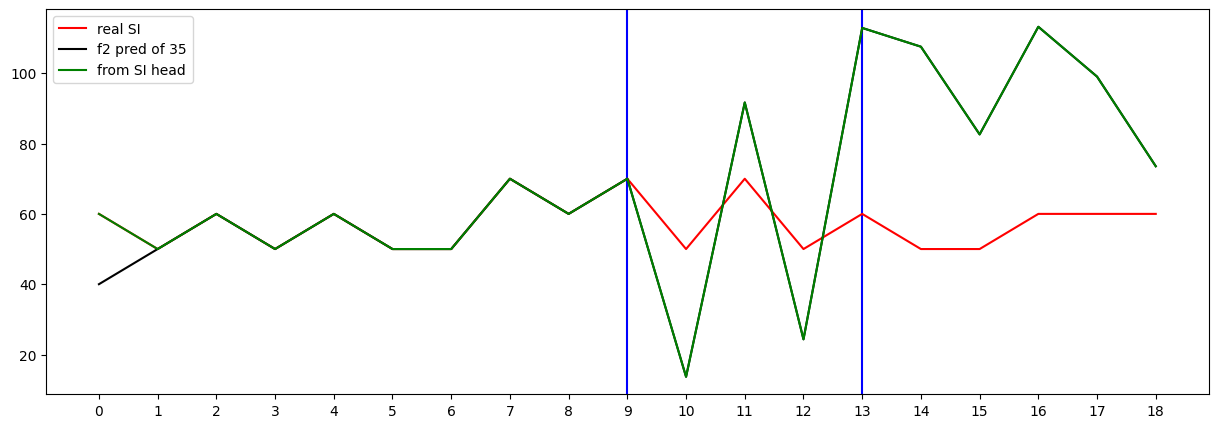

Testing R**2 - (all) - (no inputs):  0.9935581751246113
Testing R**2 - (f2) - SI full (no inputs):  -51.04776356696021
Testing R**2 - SI head only (no inputs):  -51.04776356696021
0 ...index R**2 (no inputs):  -0.3377640559462407
1 ...index R**2 (no inputs):  -187.789088189921
2 ...index R**2 (no inputs):  -51.04776356696021
3 ...index R**2 (no inputs):  -1530.4525810136977
4 ...index R**2 (no inputs):  -385.24528742742757
5 ...index R**2 (no inputs):  -1427.5620363041237
6 ...index R**2 (no inputs):  -111.07329609158569
7 ...index R**2 (no inputs):  -522.9407075233099
8 ...index R**2 (no inputs):  -277.4515179427211
9 ...index R**2 (no inputs):  -24.3391024892487
10 ...index R**2 (no inputs):  -74.87432855118068
11 ...index R**2 (no inputs):  -165.24597983578985
12 ...index R**2 (no inputs):  -100.8321088752248
13 ...index R**2 (no inputs):  -507.4472493204043
14 ...index R**2 (no inputs):  -107.12326515718388
15 ...index R**2 (no inputs):  -820.0999624156578
16 ...index R**2 (no inpu

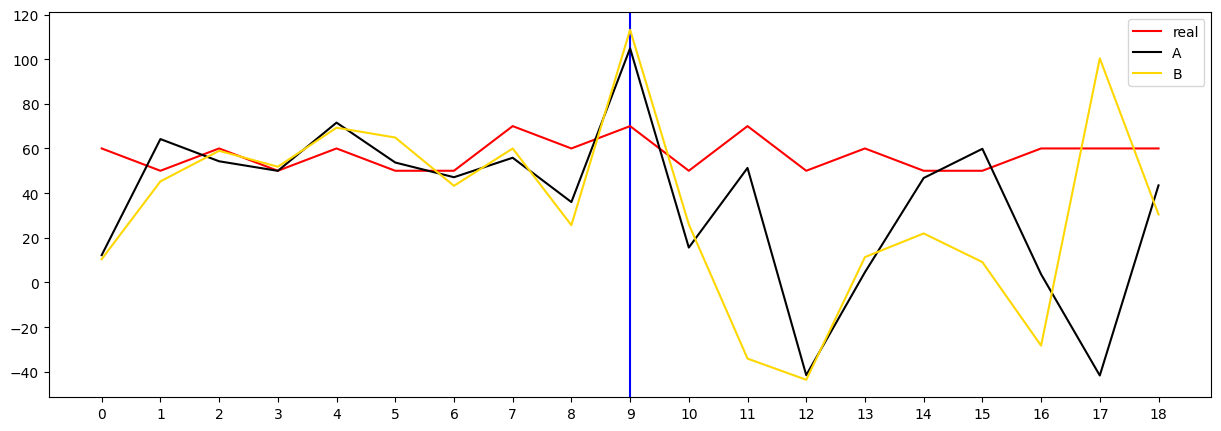

Which prediction is better? (A/B/skip): a
Saved preference.


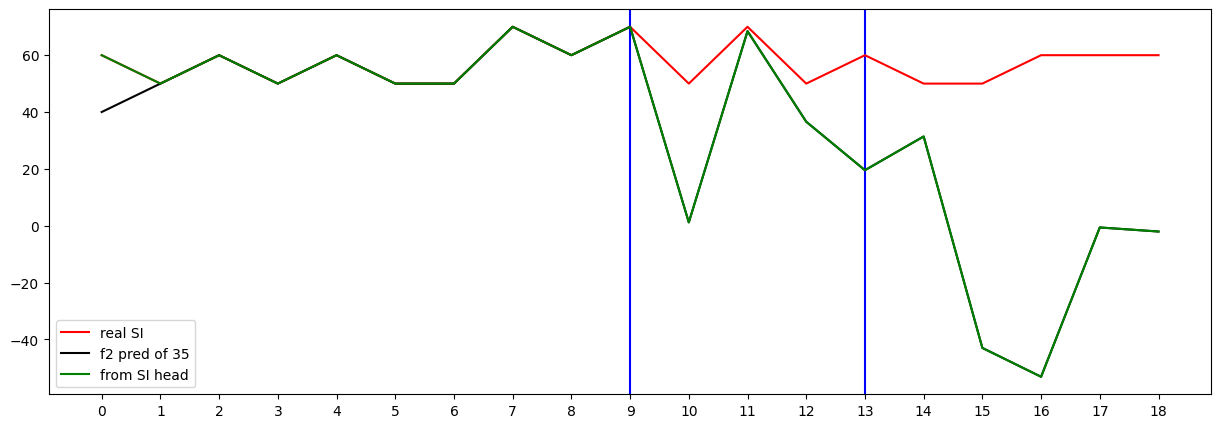

Testing R**2 - (all) - (no inputs):  0.9877750546299633
Testing R**2 - (f2) - SI full (no inputs):  -105.46043748981246
Testing R**2 - SI head only (no inputs):  -105.46043748981246
0 ...index R**2 (no inputs):  0.022205882346605477
1 ...index R**2 (no inputs):  -153.01441444752854
2 ...index R**2 (no inputs):  -105.46043748981246
3 ...index R**2 (no inputs):  -254.02525469792312
4 ...index R**2 (no inputs):  -73.29382610057604
5 ...index R**2 (no inputs):  -2349.9708062664067
6 ...index R**2 (no inputs):  -44.69474612594599
7 ...index R**2 (no inputs):  -13218.81250668558
8 ...index R**2 (no inputs):  -43.10473366940226
9 ...index R**2 (no inputs):  -1764.4017156833343
10 ...index R**2 (no inputs):  -431.13271466264683
11 ...index R**2 (no inputs):  -274.5815181062167
12 ...index R**2 (no inputs):  -326.04253499726417
13 ...index R**2 (no inputs):  -46.34594879443247
14 ...index R**2 (no inputs):  -200.6926051594978
15 ...index R**2 (no inputs):  -13376.026252552405
16 ...index R**2 (

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




[0] Train Loss: 1.292772
Loss_SI: 1.2294081449508667 Loss_all: 1.2862659692764282
===


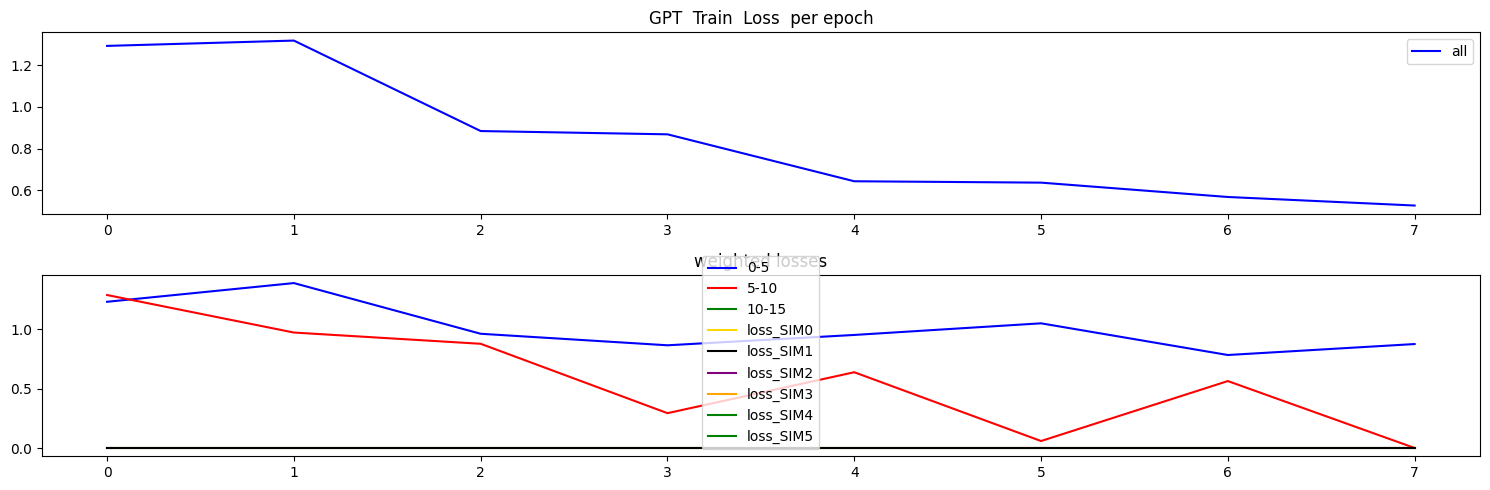

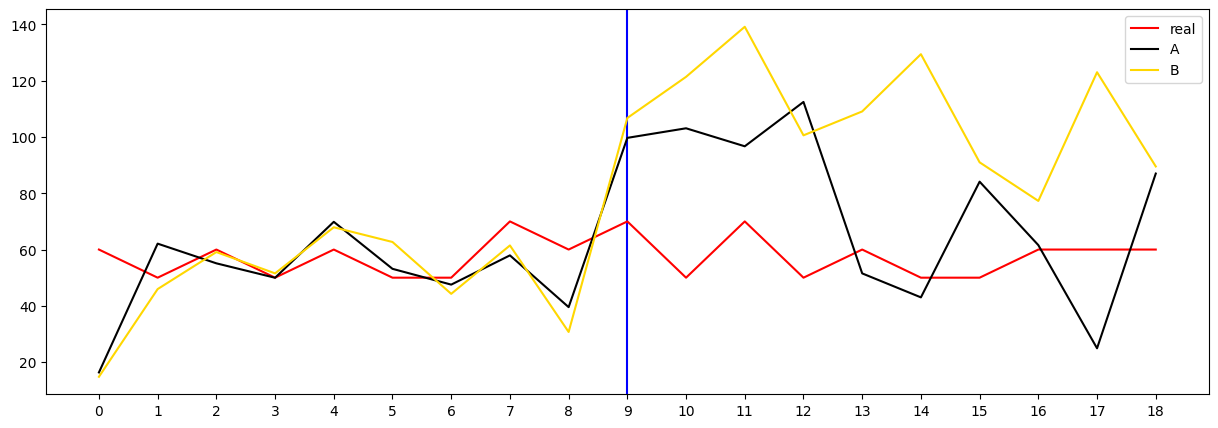

Which prediction is better? (A/B/skip): a
Saved preference.


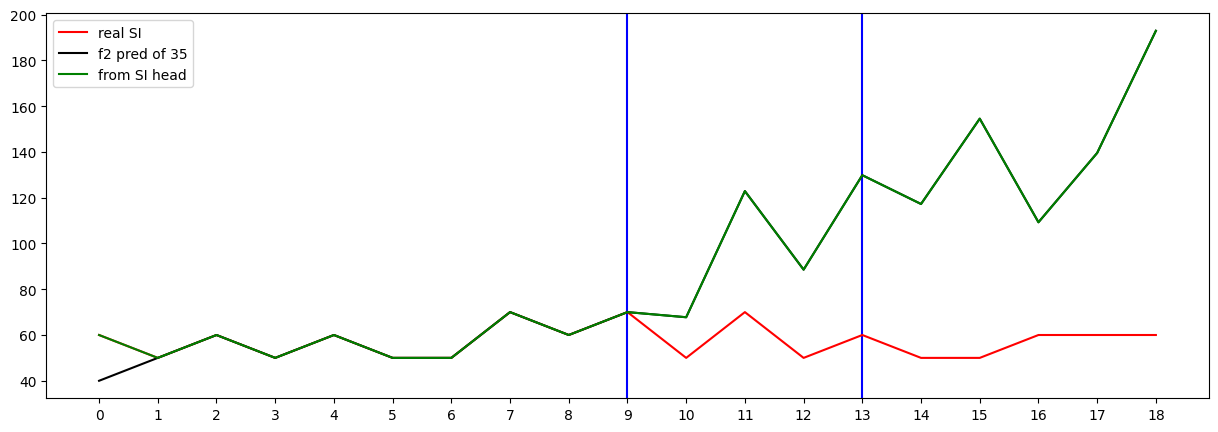

Testing R**2 - (all) - (no inputs):  0.9864745439346214
Testing R**2 - (f2) - SI full (no inputs):  -146.29867804670045
Testing R**2 - SI head only (no inputs):  -146.29867804670045
0 ...index R**2 (no inputs):  0.14516936558251636
1 ...index R**2 (no inputs):  -29.625311031667373
2 ...index R**2 (no inputs):  -146.29867804670045
3 ...index R**2 (no inputs):  -2341.9830863531456
4 ...index R**2 (no inputs):  -46.84741834621902
5 ...index R**2 (no inputs):  -113.55039745257342
6 ...index R**2 (no inputs):  -10.484382501907135
7 ...index R**2 (no inputs):  -442.9962636729659
8 ...index R**2 (no inputs):  -71.0652621610454
9 ...index R**2 (no inputs):  -53.84307225749089
10 ...index R**2 (no inputs):  -113.52459448569758
11 ...index R**2 (no inputs):  -8559.846169921988
12 ...index R**2 (no inputs):  -31.80890061078651
13 ...index R**2 (no inputs):  -209.81556356611725
14 ...index R**2 (no inputs):  -77.37159936460168
15 ...index R**2 (no inputs):  -3707.3266429585915
16 ...index R**2 (no

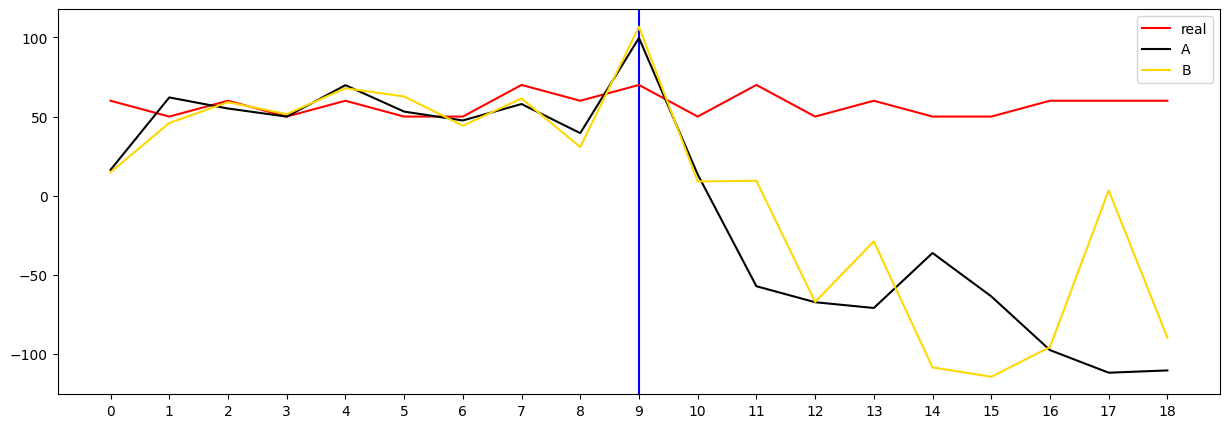

Which prediction is better? (A/B/skip): s


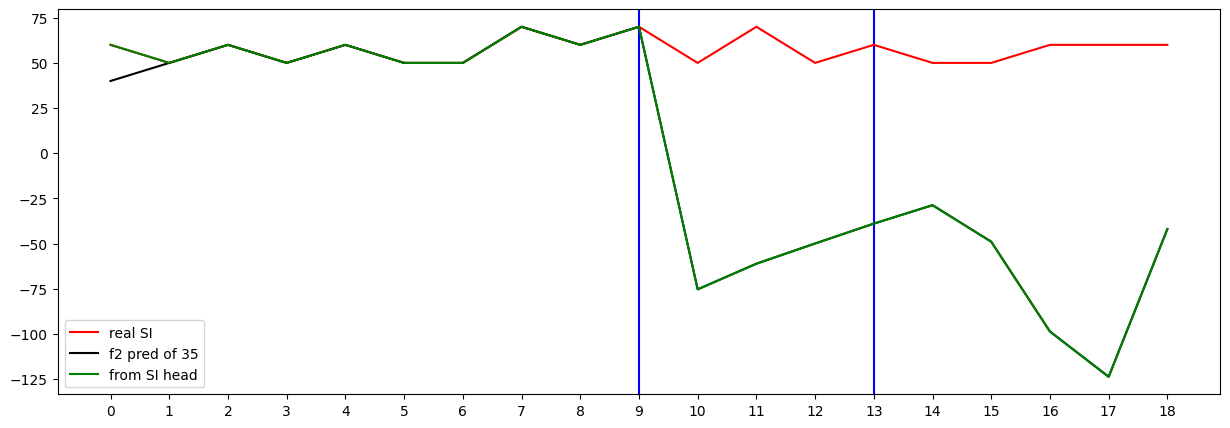

Testing R**2 - (all) - (no inputs):  0.9658062514054231
Testing R**2 - (f2) - SI full (no inputs):  -395.3318051527559
Testing R**2 - SI head only (no inputs):  -395.3318051527559
0 ...index R**2 (no inputs):  -0.4775821917155303
1 ...index R**2 (no inputs):  -144.5667158968725
2 ...index R**2 (no inputs):  -395.3318051527559
3 ...index R**2 (no inputs):  -5552.27572680973
4 ...index R**2 (no inputs):  -34.87572823152673
5 ...index R**2 (no inputs):  -1784.7034608561898
6 ...index R**2 (no inputs):  -427.6608479752625
7 ...index R**2 (no inputs):  -16627.566893316154
8 ...index R**2 (no inputs):  -375.11811676991977
9 ...index R**2 (no inputs):  -674.329047845303
10 ...index R**2 (no inputs):  -1547.9101135481303
11 ...index R**2 (no inputs):  -30799.703616709754
12 ...index R**2 (no inputs):  -181.33517446353355
13 ...index R**2 (no inputs):  -183.48911074017448
14 ...index R**2 (no inputs):  -57.53609384567427
15 ...index R**2 (no inputs):  -35423.62513607572
16 ...index R**2 (no inp

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.402740
Loss_SI: 1.3033462762832642 Loss_all: 1.3961694240570068
===


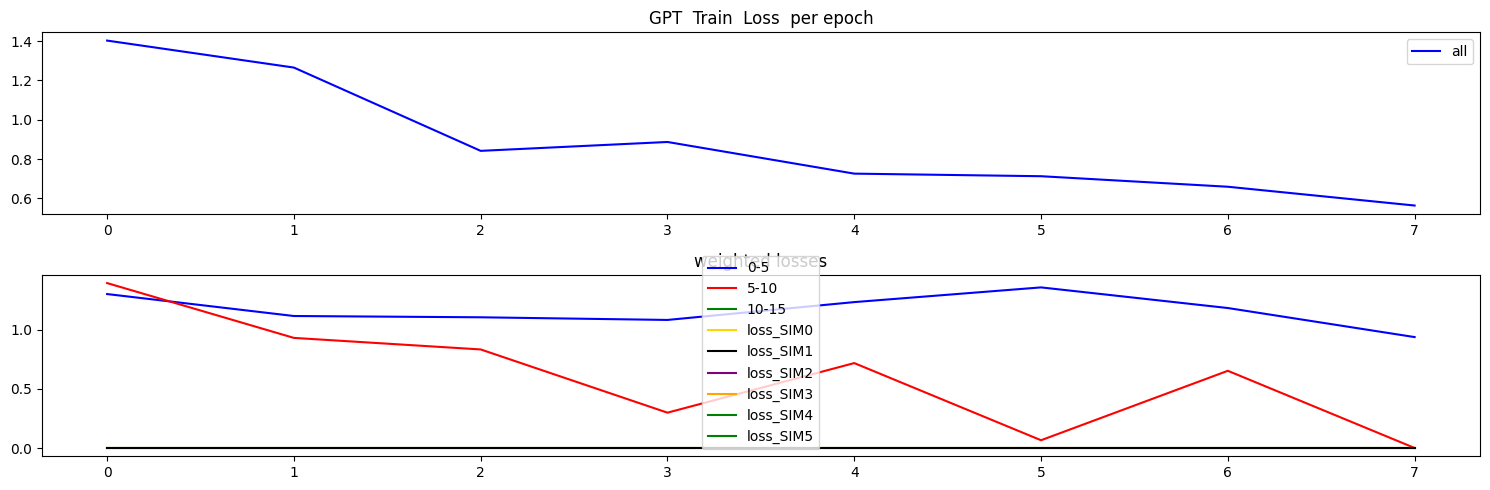

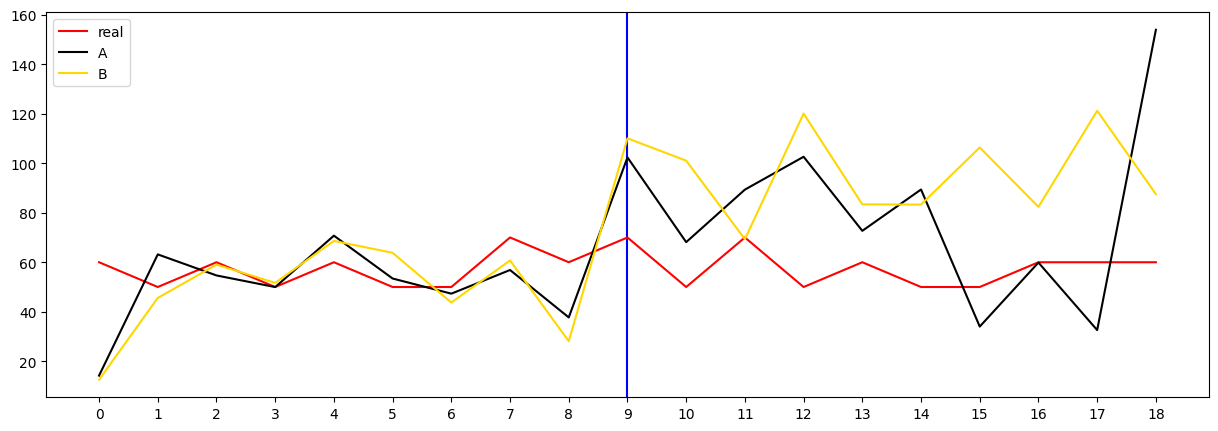

Which prediction is better? (A/B/skip): s


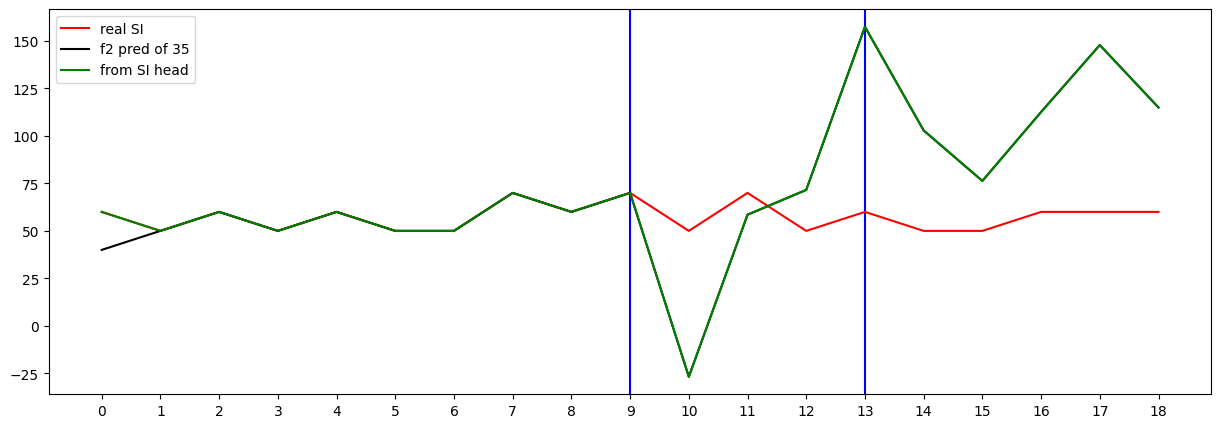

Testing R**2 - (all) - (no inputs):  0.9896117707811547
Testing R**2 - (f2) - SI full (no inputs):  -104.94054481776513
Testing R**2 - SI head only (no inputs):  -104.94054481776513
0 ...index R**2 (no inputs):  -1.271234030805716
1 ...index R**2 (no inputs):  -192.63496227805197
2 ...index R**2 (no inputs):  -104.94054481776513
3 ...index R**2 (no inputs):  -1656.6697673766478
4 ...index R**2 (no inputs):  -217.41493936992055
5 ...index R**2 (no inputs):  -1221.8734729200742
6 ...index R**2 (no inputs):  -26.442645451539665
7 ...index R**2 (no inputs):  -2387.695955956311
8 ...index R**2 (no inputs):  -119.60218730204804
9 ...index R**2 (no inputs):  -94.3319938668236
10 ...index R**2 (no inputs):  -61.312261315451494
11 ...index R**2 (no inputs):  -42152.590642763265
12 ...index R**2 (no inputs):  -29.97794259598339
13 ...index R**2 (no inputs):  -101.55302786311955
14 ...index R**2 (no inputs):  -112.95888888458065
15 ...index R**2 (no inputs):  -9585.511365509994
16 ...index R**2 (

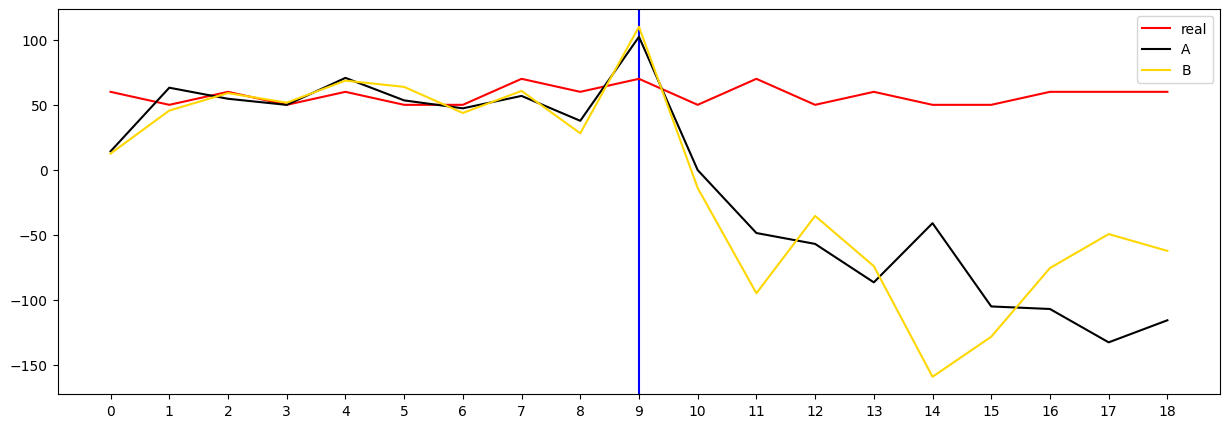

Which prediction is better? (A/B/skip): a
Saved preference.


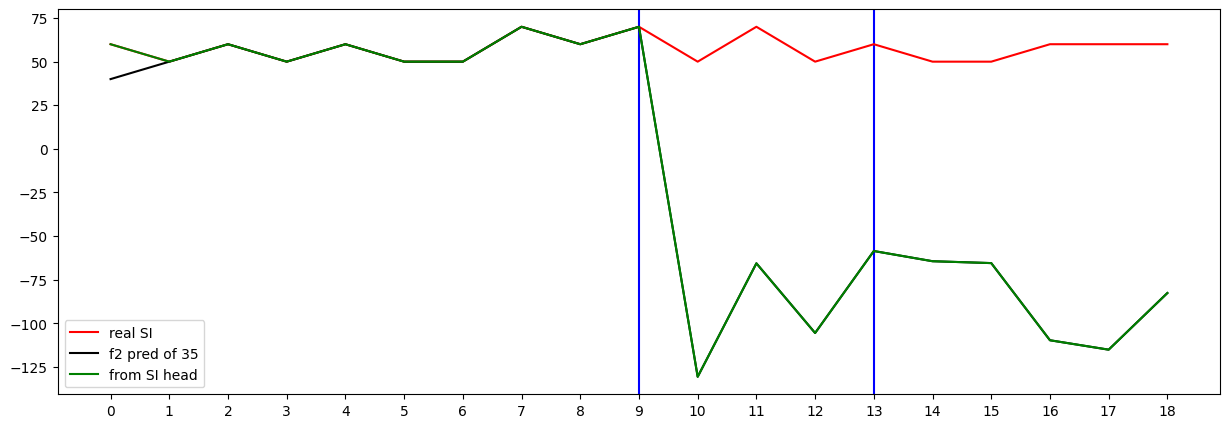

Testing R**2 - (all) - (no inputs):  0.9525529779498666
Testing R**2 - (f2) - SI full (no inputs):  -565.7337795826505
Testing R**2 - SI head only (no inputs):  -565.7337795826505
0 ...index R**2 (no inputs):  -3.328964115797887
1 ...index R**2 (no inputs):  -39.195609125782255
2 ...index R**2 (no inputs):  -565.7337795826505
3 ...index R**2 (no inputs):  -600.730558076674
4 ...index R**2 (no inputs):  -33.01878871646168
5 ...index R**2 (no inputs):  -901.1631729003556
6 ...index R**2 (no inputs):  -76.09909582236122
7 ...index R**2 (no inputs):  -2957.2660205112634
8 ...index R**2 (no inputs):  -609.9845047163373
9 ...index R**2 (no inputs):  -608.5663327654679
10 ...index R**2 (no inputs):  -1563.0147127096411
11 ...index R**2 (no inputs):  -13756.37915417705
12 ...index R**2 (no inputs):  -81.05308125676383
13 ...index R**2 (no inputs):  -409.1262173434955
14 ...index R**2 (no inputs):  -94.32176098361494
15 ...index R**2 (no inputs):  -31960.74437912422
16 ...index R**2 (no inputs)

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.338340
Loss_SI: 1.3377258777618408 Loss_all: 1.3318352699279785
===


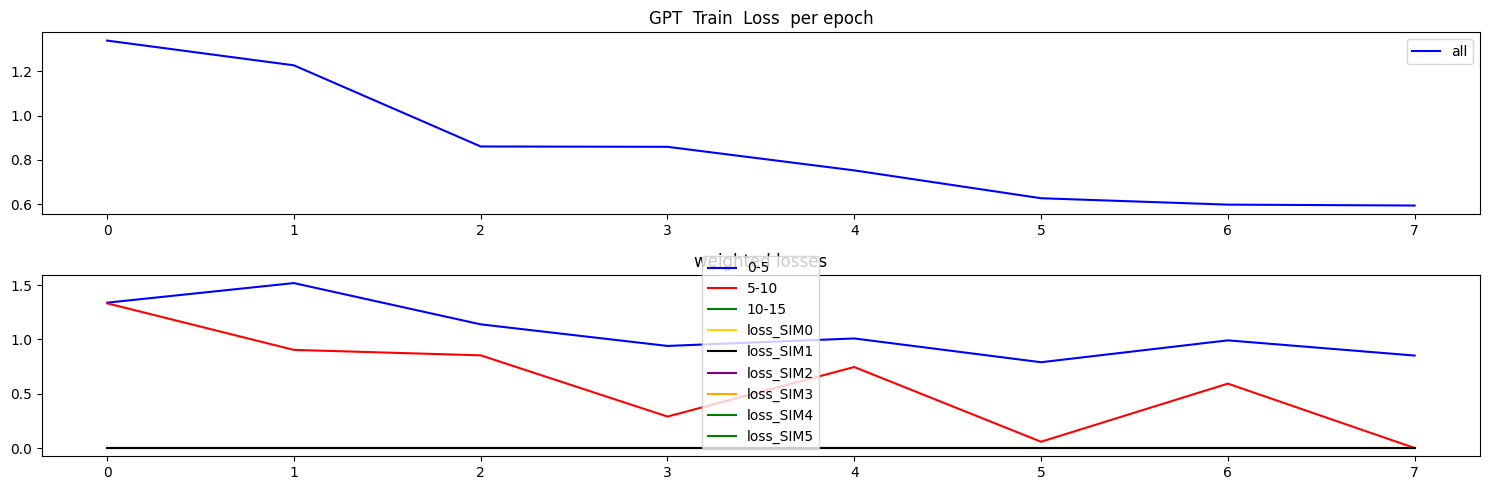

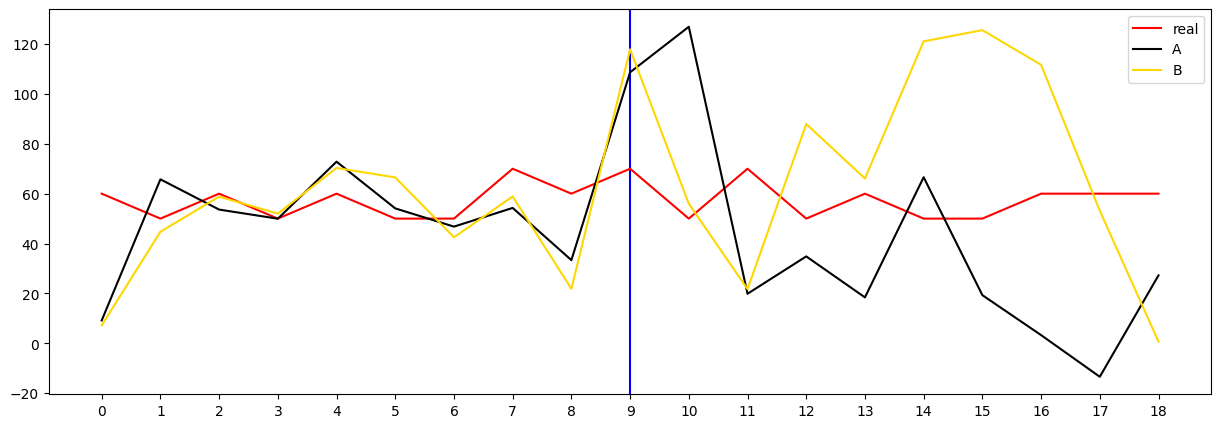

Which prediction is better? (A/B/skip): s


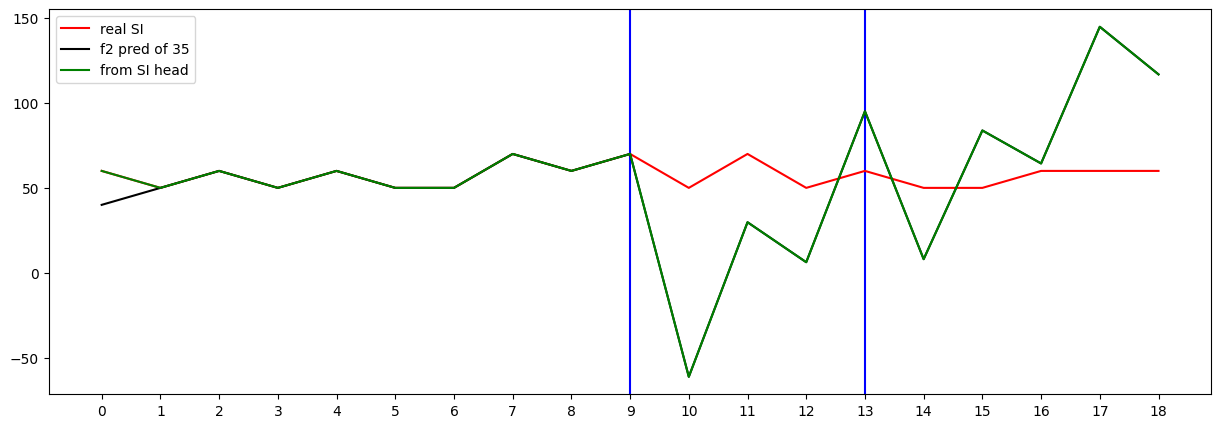

Testing R**2 - (all) - (no inputs):  0.9901255245863203
Testing R**2 - (f2) - SI full (no inputs):  -98.52939230827675
Testing R**2 - SI head only (no inputs):  -98.52939230827675
0 ...index R**2 (no inputs):  -1.170463707496908
1 ...index R**2 (no inputs):  -32.755285096384036
2 ...index R**2 (no inputs):  -98.52939230827675
3 ...index R**2 (no inputs):  -1357.5485010636783
4 ...index R**2 (no inputs):  -9.583412290845414
5 ...index R**2 (no inputs):  -219.55506847949198
6 ...index R**2 (no inputs):  -82.26418237038736
7 ...index R**2 (no inputs):  -410.3864130922718
8 ...index R**2 (no inputs):  -67.51132350132355
9 ...index R**2 (no inputs):  -140.45534287219618
10 ...index R**2 (no inputs):  -493.5808615406079
11 ...index R**2 (no inputs):  -25754.801336484332
12 ...index R**2 (no inputs):  -82.18416804503514
13 ...index R**2 (no inputs):  -40.41711082028284
14 ...index R**2 (no inputs):  -53.63728803621567
15 ...index R**2 (no inputs):  -16756.341366449873
16 ...index R**2 (no inp

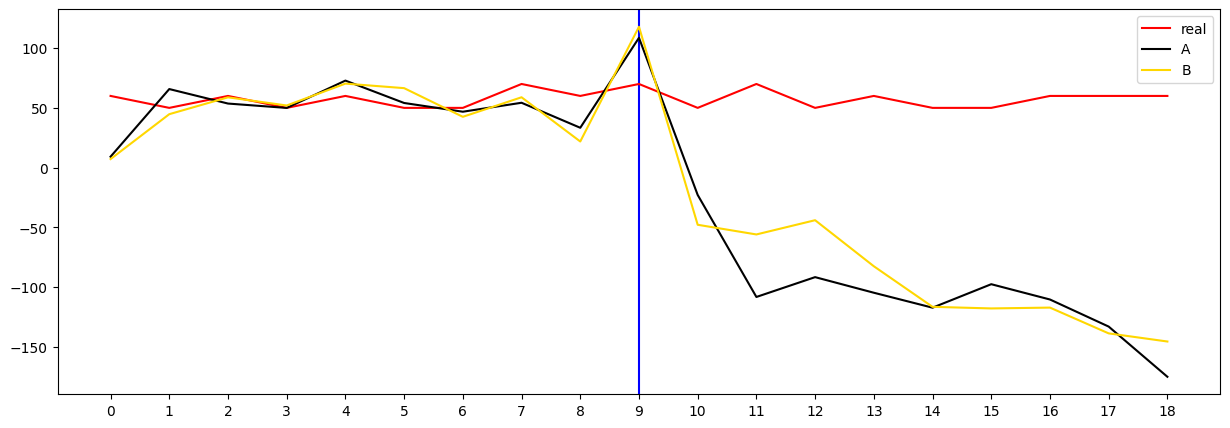

Which prediction is better? (A/B/skip): s


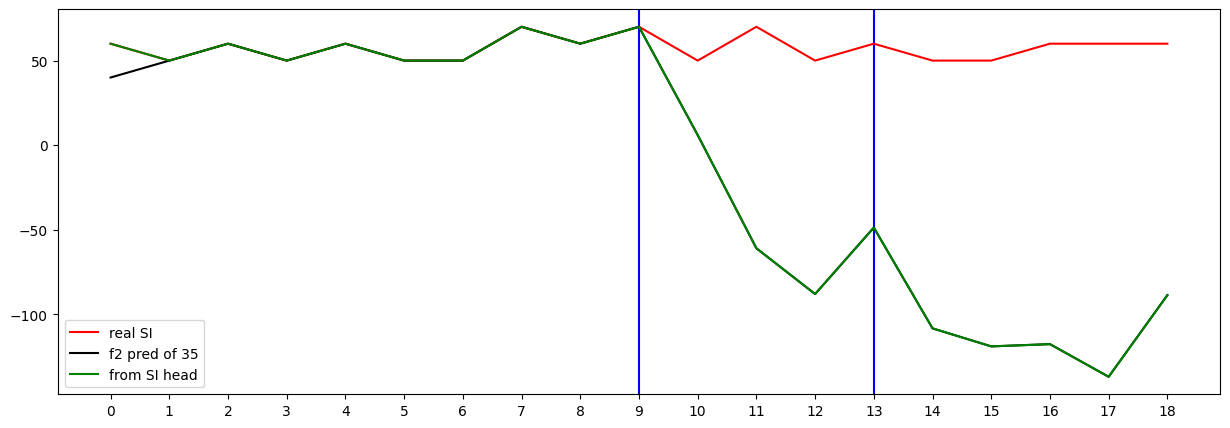

Testing R**2 - (all) - (no inputs):  0.9534275480652039
Testing R**2 - (f2) - SI full (no inputs):  -554.8204086461943
Testing R**2 - SI head only (no inputs):  -554.8204086461943
0 ...index R**2 (no inputs):  -0.3972301276491901
1 ...index R**2 (no inputs):  -68.01175444271823
2 ...index R**2 (no inputs):  -554.8204086461943
3 ...index R**2 (no inputs):  -7449.745011943699
4 ...index R**2 (no inputs):  -36.000184382026525
5 ...index R**2 (no inputs):  -1878.175987231603
6 ...index R**2 (no inputs):  -1045.5865941079862
7 ...index R**2 (no inputs):  -21066.409910786104
8 ...index R**2 (no inputs):  -140.30386048624896
9 ...index R**2 (no inputs):  -393.84565921102296
10 ...index R**2 (no inputs):  -508.69773892198066
11 ...index R**2 (no inputs):  -11666.362509306397
12 ...index R**2 (no inputs):  -170.42601252229176
13 ...index R**2 (no inputs):  -194.85598529423797
14 ...index R**2 (no inputs):  -21.91178158179082
15 ...index R**2 (no inputs):  -6455.94582370803
16 ...index R**2 (no 

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )





## R2 over accumulated Runs


In [49]:

inferenceGPT_obj.print_ALL_R2s_THE_END()


====================================400to500
1 .....................R² on first n steps - R²: -64.22860275268555
Naive_R2:....................................R²: -64.2286
RMSE:65.9437,MAE:57.0856,MASE:5.7086
1 .......................R² on just step n - R²: -64.22860275268555
Naive_R2:....................................R²: -64.2286
RMSE:65.9437,MAE:57.0856,MASE:5.7086
2 .....................R² on first n steps - R²: -11.79140234375
Naive_R2:....................................R²: -6.4617
RMSE:61.0805,MAE:53.8077,MASE:2.6904
2 .......................R² on just step n - R²: -5.670881107875279
Naive_R2:....................................R²: -1.2779
RMSE:55.7950,MAE:50.5298,MASE:1.1229
3 .....................R² on first n steps - R²: -12.077362394047954
Naive_R2:....................................R²: -6.9257
RMSE:53.9081,MAE:44.0141,MASE:2.7086
3 .......................R² on just step n - R²: -17.84885567754507
Naive_R2:....................................R²: -6.5395
RMSE:35.4484,MAE:24.

In [50]:

print("End")


End
